# Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from  matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

sns.set(rc={"figure.dpi":300, 'savefig.dpi':800})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 800

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman')
plt.rcParams['font.family'] = 'Times New Roman'

# Exploratory Data Analysis

In [93]:
df = pd.read_csv("s1.csv")                                   # Import dataset (drawn from literature of Yuan et. al.)

df.drop([0,1], axis=0, inplace=True)                         # Irrelevant row (you can check using df.head())
df.reset_index(inplace=True)                                 # Resetting index numbers
df.drop('index', axis=1, inplace=True)                       # Removing index number column

df.columns  = df.iloc[0].values                              # First row is the name of the columns
df.drop([0], axis=0, inplace=True)                           # Columns name assigned as per the first row. Now we are deleting the first row

df.drop(df.columns[10:], axis=1, inplace=True)               # Reference and Nan columns are of no use for ML models

df.head()                                                    # Display the first five row of the dataset

,Drug name,Drug loading in MN patch (µg),Drug MW (Dalton),MN Length (mm),Skin type (rat =1; human = 2),MN type (hydrogel =1; plastic = 2),MN surface area (mm2),Permeation time (hour),Drug permeation percentage,Drug permeation amounts (µg/cm2)
1,BSA,531,66000,0.82,1,1,26.76103315,1,17.6958866,93.96515777
2,BSA,526,66000,0.82,1,1,26.76103315,1,19.6069373,103.1324902
3,BSA,1637,66000,0.82,1,1,26.76103315,1,21.105305,345.4938423
4,BSA,531,66000,0.82,1,1,26.76103315,3,43.4244588,230.5838763
5,BSA,526,66000,0.82,1,1,26.76103315,3,41.0656409,216.0052712


In [95]:
df.shape             # Display the number of rows and columns in the dataset, respectively.

(191, 10)

In [97]:
# Changing feature's names for better visualization in the graph
df.columns = ["Drug name", "Drug loaded", "Drug MW", "MN Length", "Skin type", "MN type", "MN surface area", "Permeation time", "Drug permeation percentage", "Drug permeation amount"]

In [99]:
df.info()         # To check the presence of null values and DType of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 1 to 191
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Drug name                   191 non-null    object
 1   Drug loaded                 191 non-null    object
 2   Drug MW                     191 non-null    object
 3   MN Length                   191 non-null    object
 4   Skin type                   191 non-null    object
 5   MN type                     191 non-null    object
 6   MN surface area             191 non-null    object
 7   Permeation time             191 non-null    object
 8   Drug permeation percentage  191 non-null    object
 9   Drug permeation amount      191 non-null    object
dtypes: object(10)
memory usage: 15.1+ KB


In [103]:
df["Drug name"].value_counts()

Drug name
lidocaine      73
BSA            33
copper ions    24
GHK peptide    24
Rhodamine B    19
caffeine       18
Name: count, dtype: int64

In [105]:
col = ['Drug name', 'Skin type', 'MN type']
for i in col:
    print("----------------------------------------------------------------------------")
    print('Unique Values in "{}":\n'.format(i),df[i].unique())

----------------------------------------------------------------------------
Unique Values in "Drug name":
 ['BSA' 'lidocaine' 'Rhodamine B' 'caffeine' 'copper ions' 'GHK peptide']
----------------------------------------------------------------------------
Unique Values in "Skin type":
 ['1' '2']
----------------------------------------------------------------------------
Unique Values in "MN type":
 ['1' '2']


In [107]:
df[['Skin type']] = df[['Skin type']].replace(to_replace={'1':'Rat skin', '2':'Human skin'})  # Replacing 1 and 2 with Rat skin and Human skin, respectively. (for better visualization in graph)
df[['MN type']] = df[['MN type']].replace(to_replace={'1':'Hydrogel', '2':'Solid'})         # Replacing 1 and 2 with Hydrogel and Solid, respectively. (for better visualization in graph)

In [109]:
# Changing the name of the drug for better visualization in graph
df[['Drug name']] = df[['Drug name']].replace(to_replace={'copper ions':'Cu ions', 'caffeine':'Caffeine', 'lidocaine':'Lidocaine', 'GHK peptide':'GHK'})

# Outlier checking - Boxplot

In [113]:
df[['Drug loaded', 'Drug MW', 'MN Length', 'MN surface area', 'Permeation time', 'Drug permeation percentage', 'Drug permeation amount']] = df[['Drug loaded', 'Drug MW', 'MN Length', 'MN surface area', 'Permeation time', 'Drug permeation percentage', 'Drug permeation amount']].astype('float64')
df.dtypes

Drug name                      object
Drug loaded                   float64
Drug MW                       float64
MN Length                     float64
Skin type                      object
MN type                        object
MN surface area               float64
Permeation time               float64
Drug permeation percentage    float64
Drug permeation amount        float64
dtype: object

<AxesSubplot:>

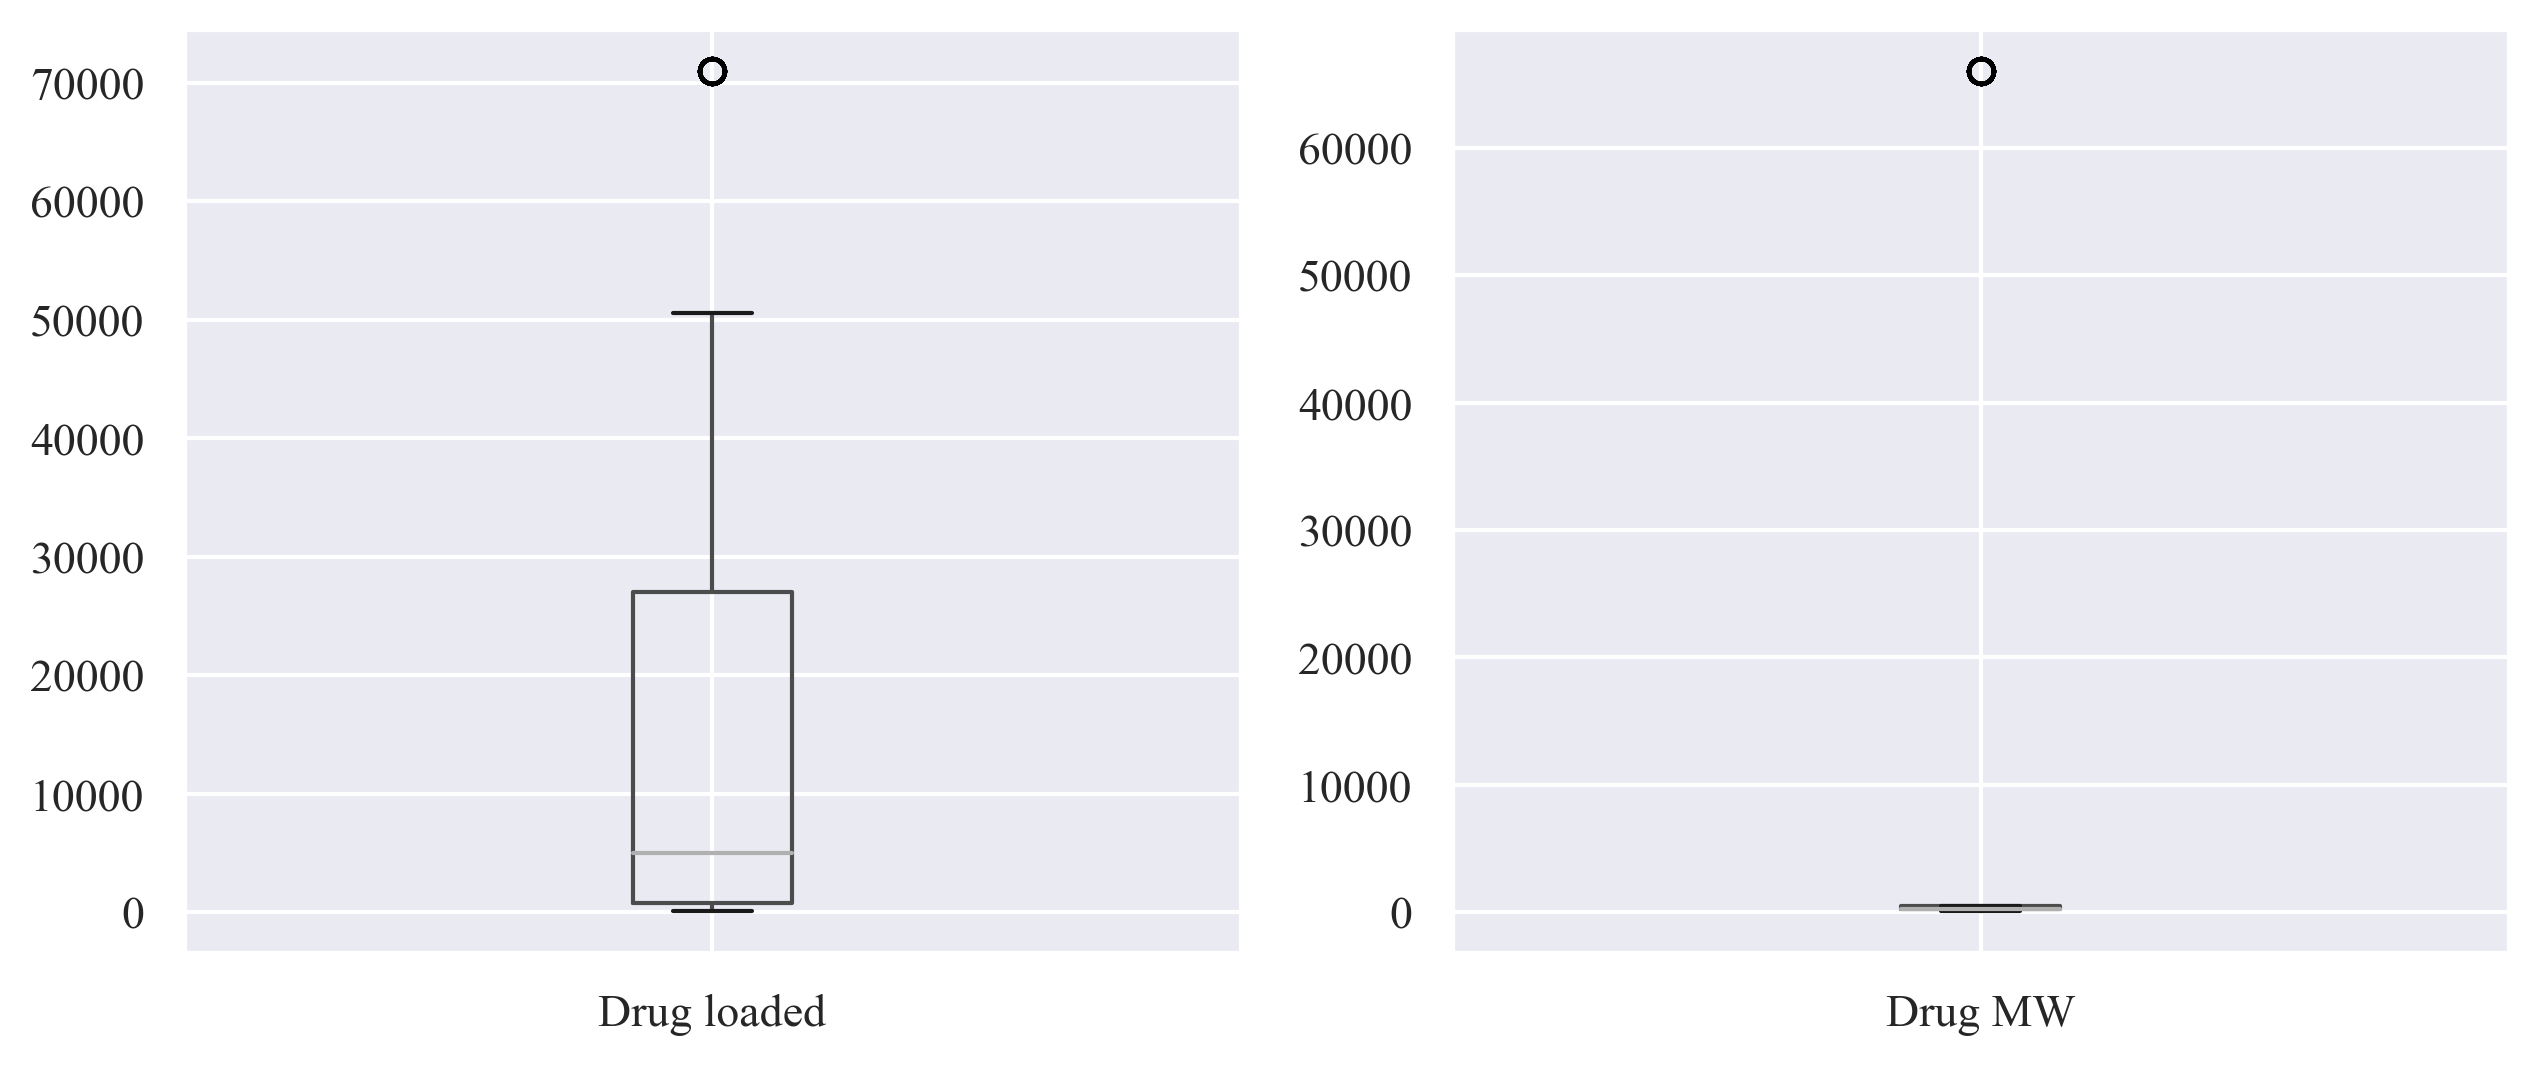

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df.boxplot('Drug loaded', ax=ax[0])
df.boxplot('Drug MW', ax=ax[1])

<AxesSubplot:>

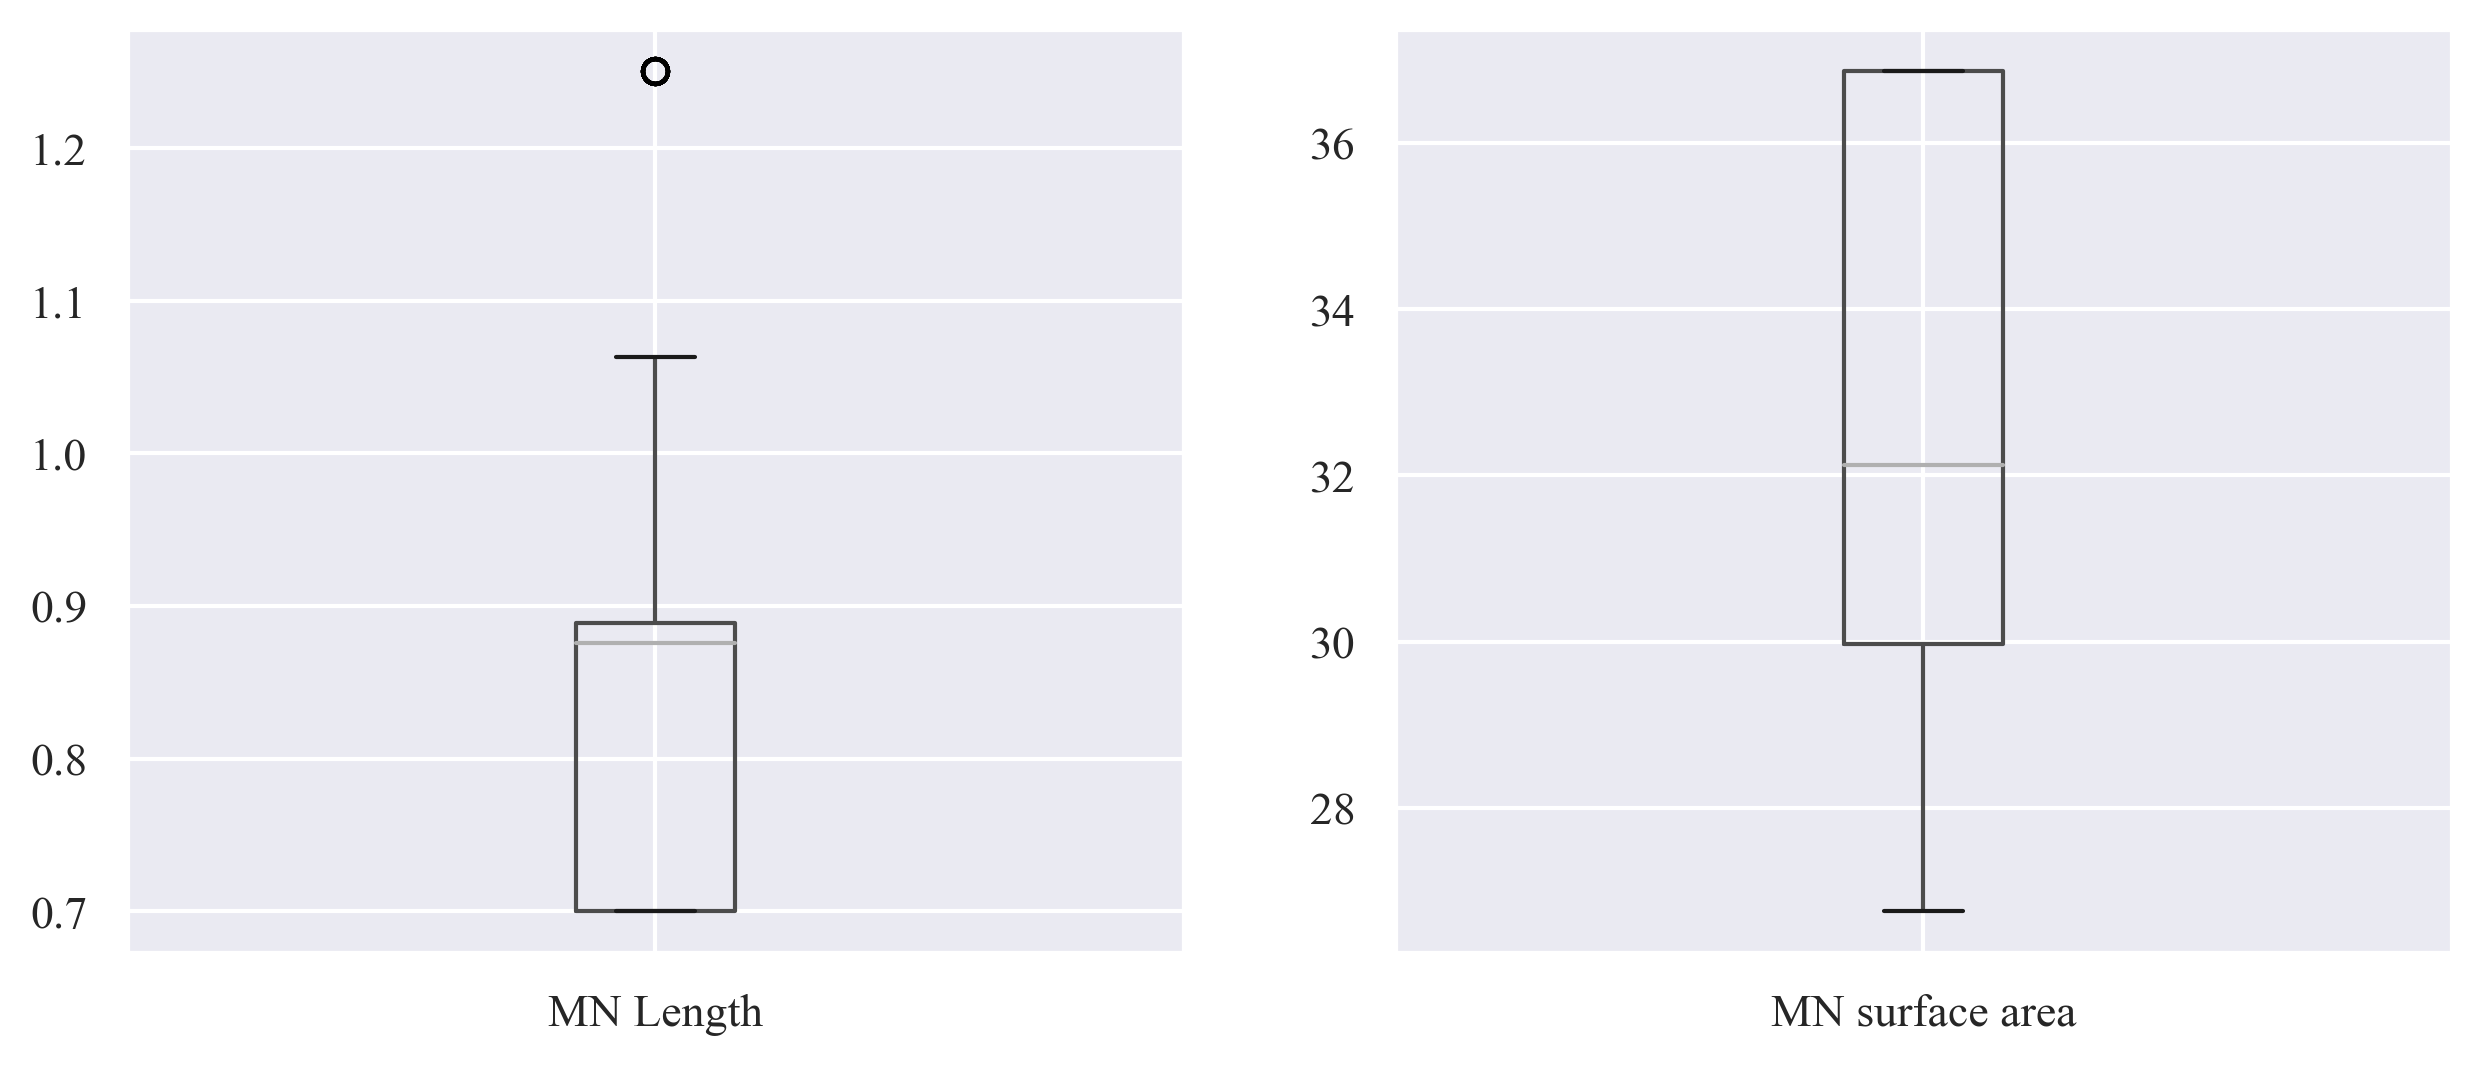

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df.boxplot('MN Length', ax=ax[0])
df.boxplot('MN surface area', ax=ax[1])

<AxesSubplot:>

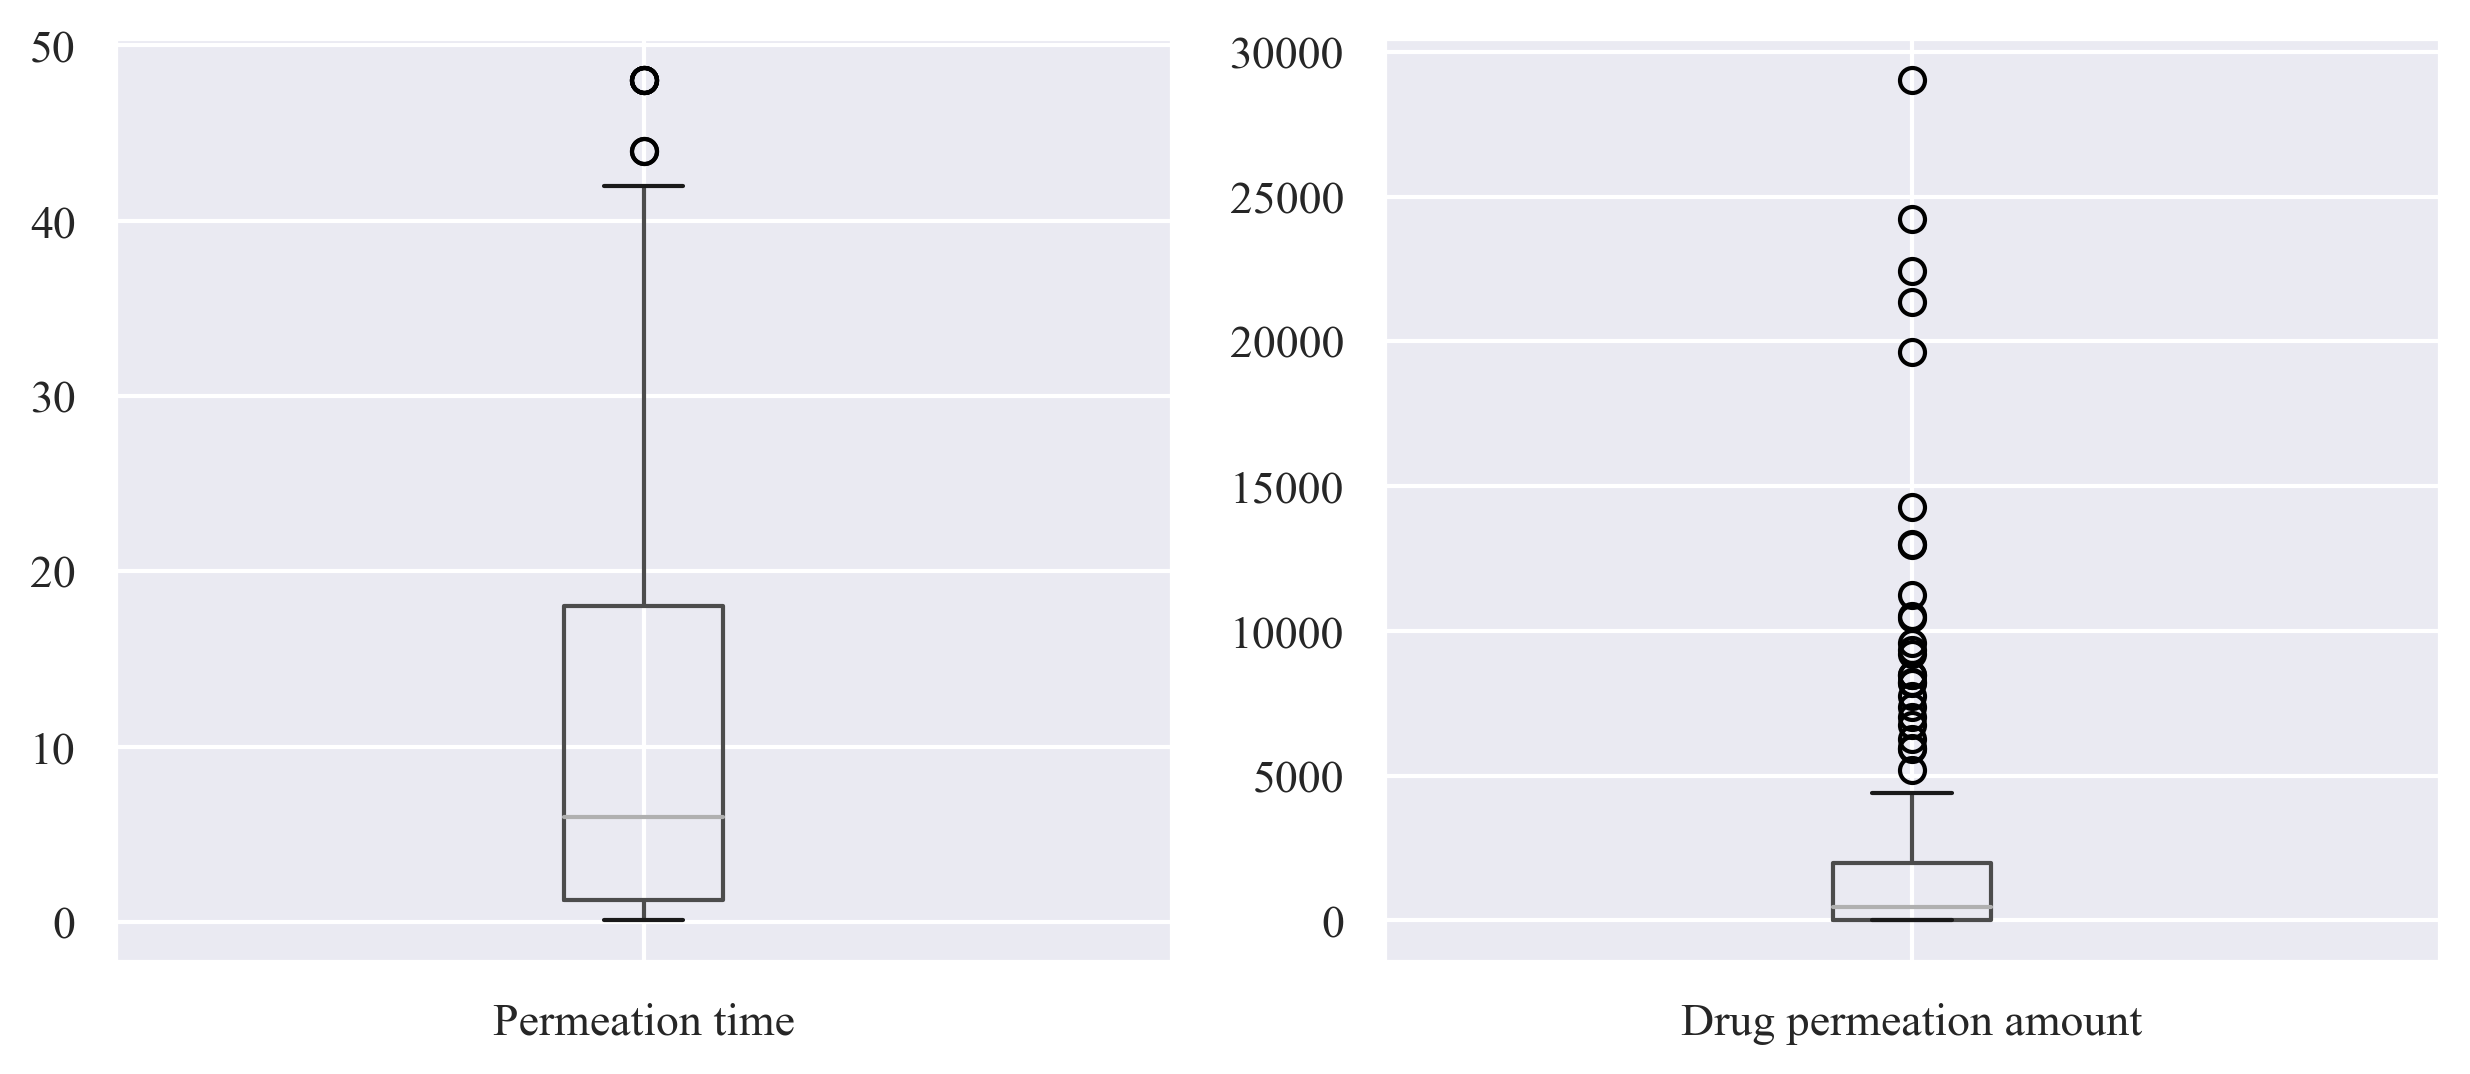

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df.boxplot('Permeation time', ax=ax[0])
df.boxplot('Drug permeation amount', ax=ax[1])

- Outlier shown in the above boxplot is actually not an outlier, which can be understood from the domain knowledge. 

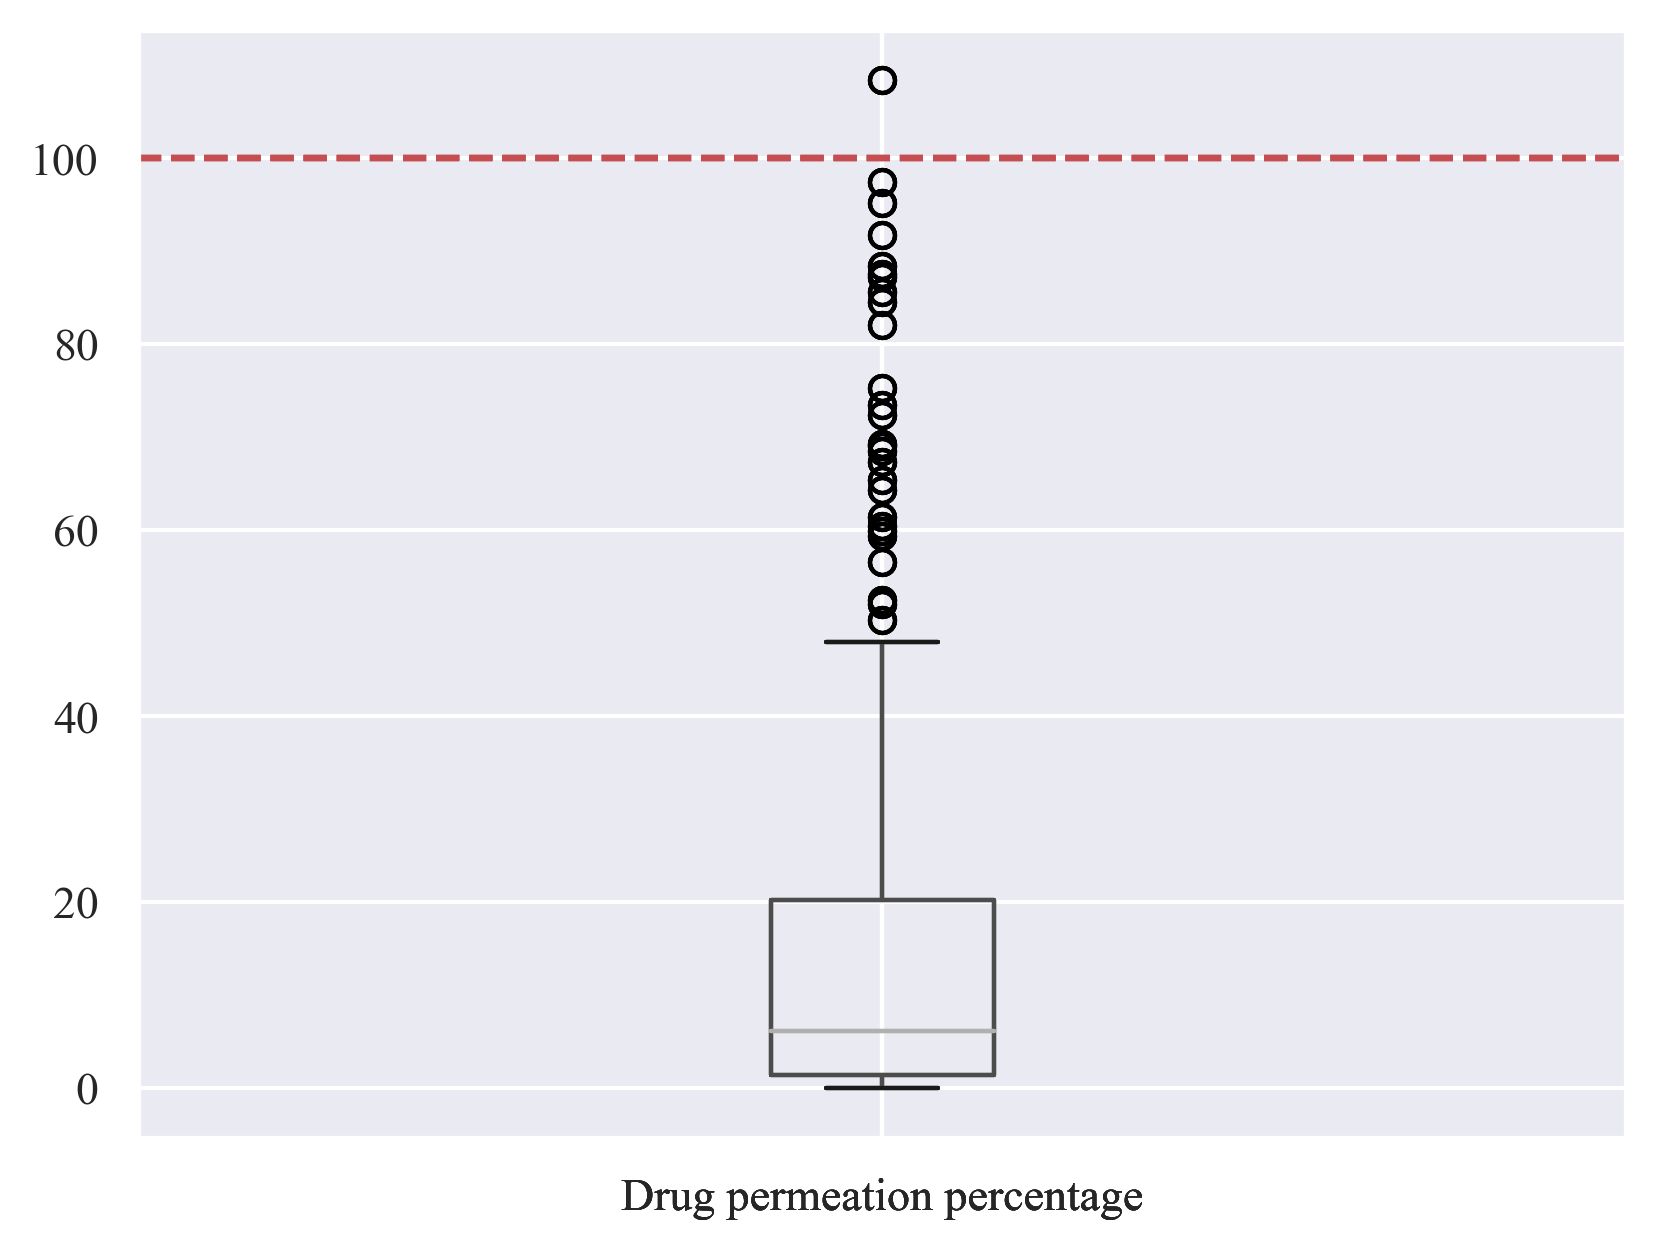

In [16]:
df.boxplot('Drug permeation percentage')
plt.axhline(y = 100, color = 'r', linestyle = '--') 
plt.show()

- Drug permeation percentage can't be above 100%. (Max drug can be permeate can be equal to drug loaded in the drug delivery system)

- Now finding the outlier row and will delete it

In [65]:
print(max(df['MN Length'].values))
print(max(df['Permeation time'].values))
print(max(df['Drug permeation percentage'].values))
print(max(df['Drug permeation amount'].values))

1.25
48.0
108.3982246
29009.78801


In [71]:
for i in range(191):
    if df['Drug permeation amount'].values[i] > df['Drug loaded'].values[i]:
        print('problem detected', i, df['Drug permeation percentage'].values[i], df['Drug permeation amount'].values[i], df['Drug loaded'].values[i])

problem detected 30 108.3982246 1178.288701 1087.0


In [73]:
df[df['Drug permeation percentage']==108.3982246]

,Drug name,Drug loaded,Drug MW,MN Length,Skin type,MN type,MN surface area,Permeation time,Drug permeation percentage,Drug permeation amount
31,BSA,1087.0,66000.0,0.82,Rat skin,Hydrogel,26.761033,48.0,108.398225,1178.288701


In [115]:
df.drop(31, axis=0, inplace=True)
df.shape

(190, 10)

In [79]:
print(max(df['Drug permeation percentage'].values))

97.4726018


# Bar Plot

In [117]:
df[['Drug name']] = df[['Drug name']].replace(to_replace={'Rhodamine B':'Rhod.B'})

<Figure size 3000x3000 with 0 Axes>

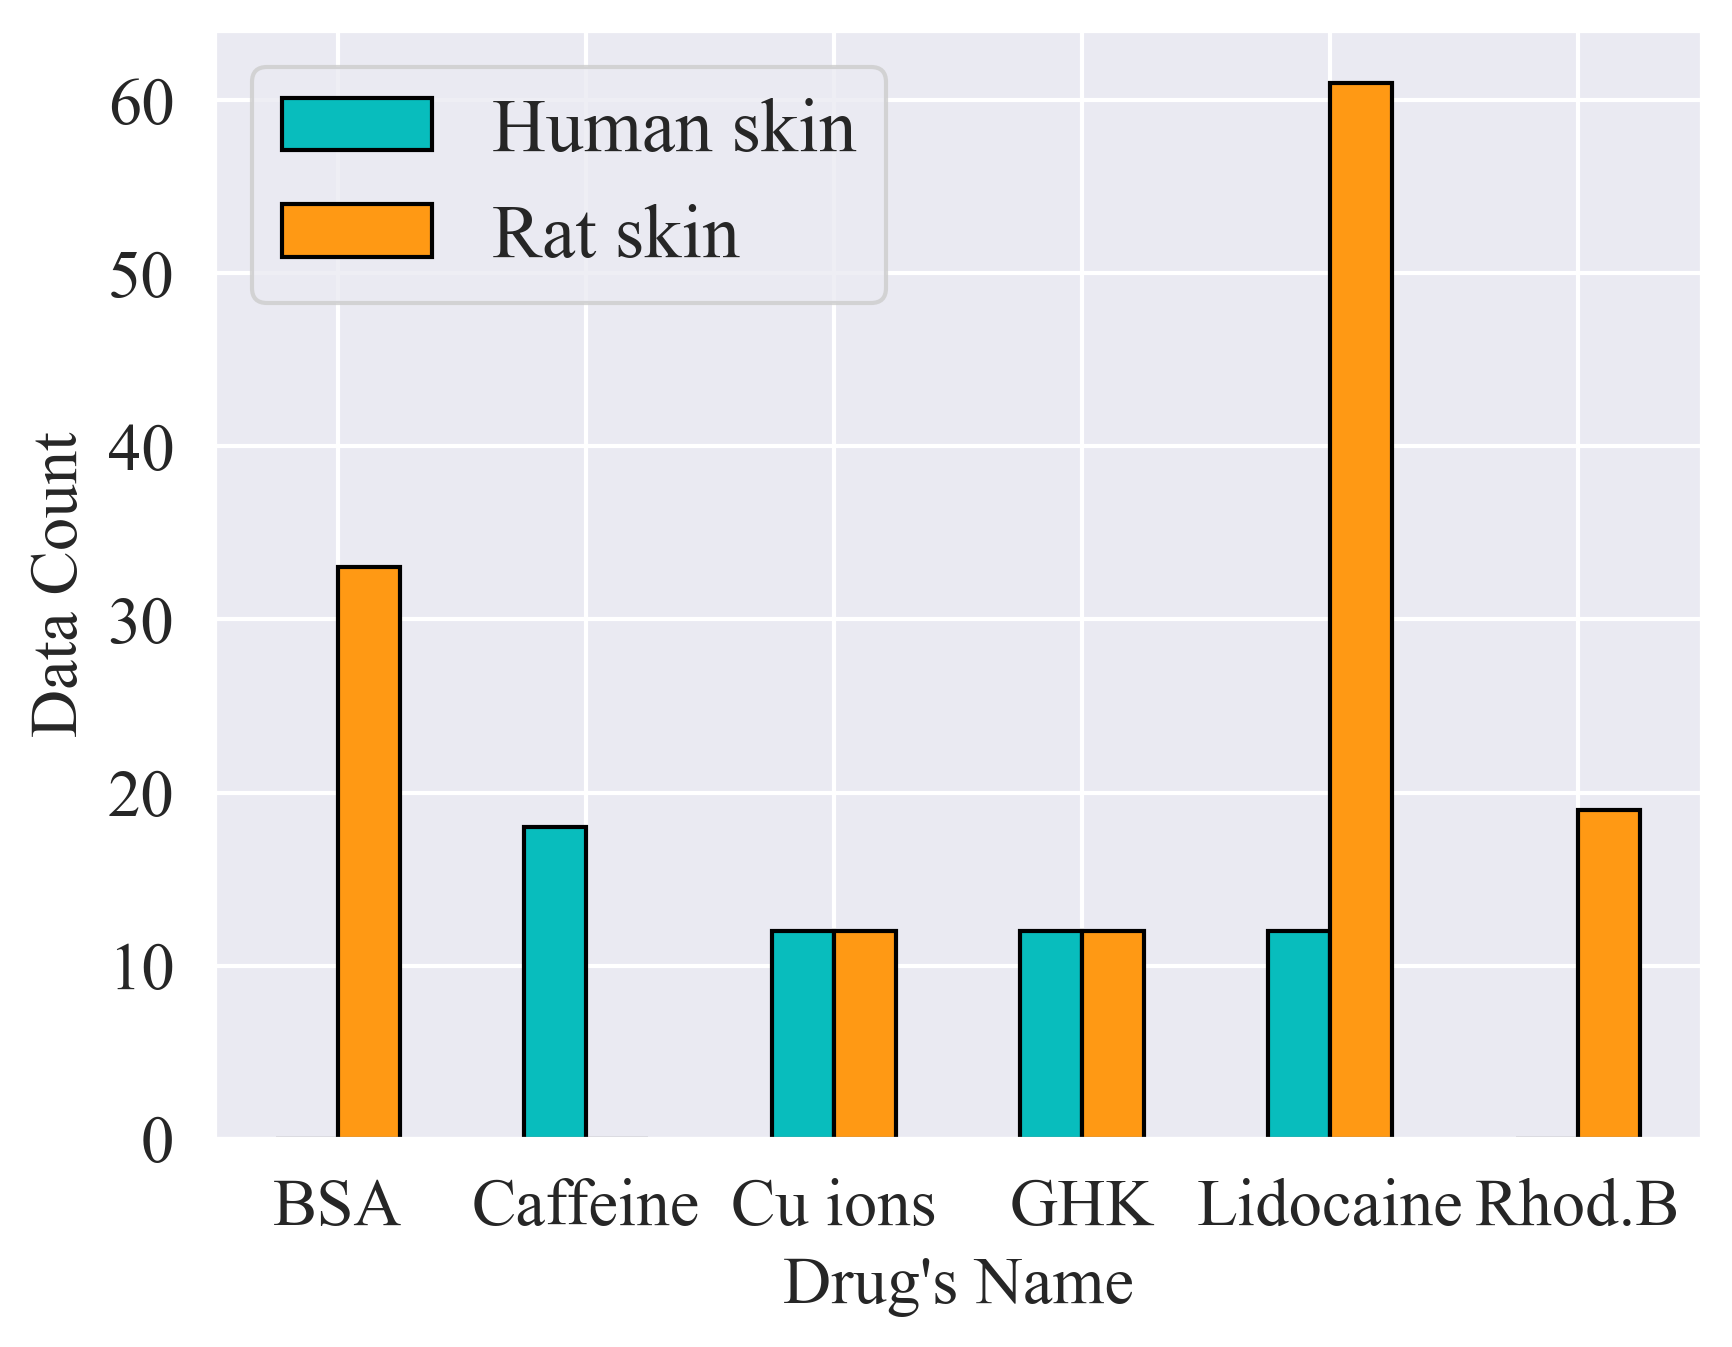

In [49]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Drug name'],df['Skin type'])
col_map = ['#08bdbd','#ff9914']
ax=prd_gender.plot(kind='bar',color=col_map, edgecolor='black', linewidth=1)
plt.xticks(rotation=0)
plt.xlabel("Drug's Name", fontsize=16, fontname='Times New Roman')
plt.ylabel("Data Count", fontsize=16, fontname='Times New Roman')
plt.xticks(fontsize=16, fontname='Times New Roman')
plt.yticks(fontsize=16, fontname='Times New Roman')
#plt.title("Drug & Skin data count", fontname='Times New Roman', fontsize=14)
plt.legend(["Human skin", "Rat skin"], fontsize="18")

<Figure size 3000x3000 with 0 Axes>

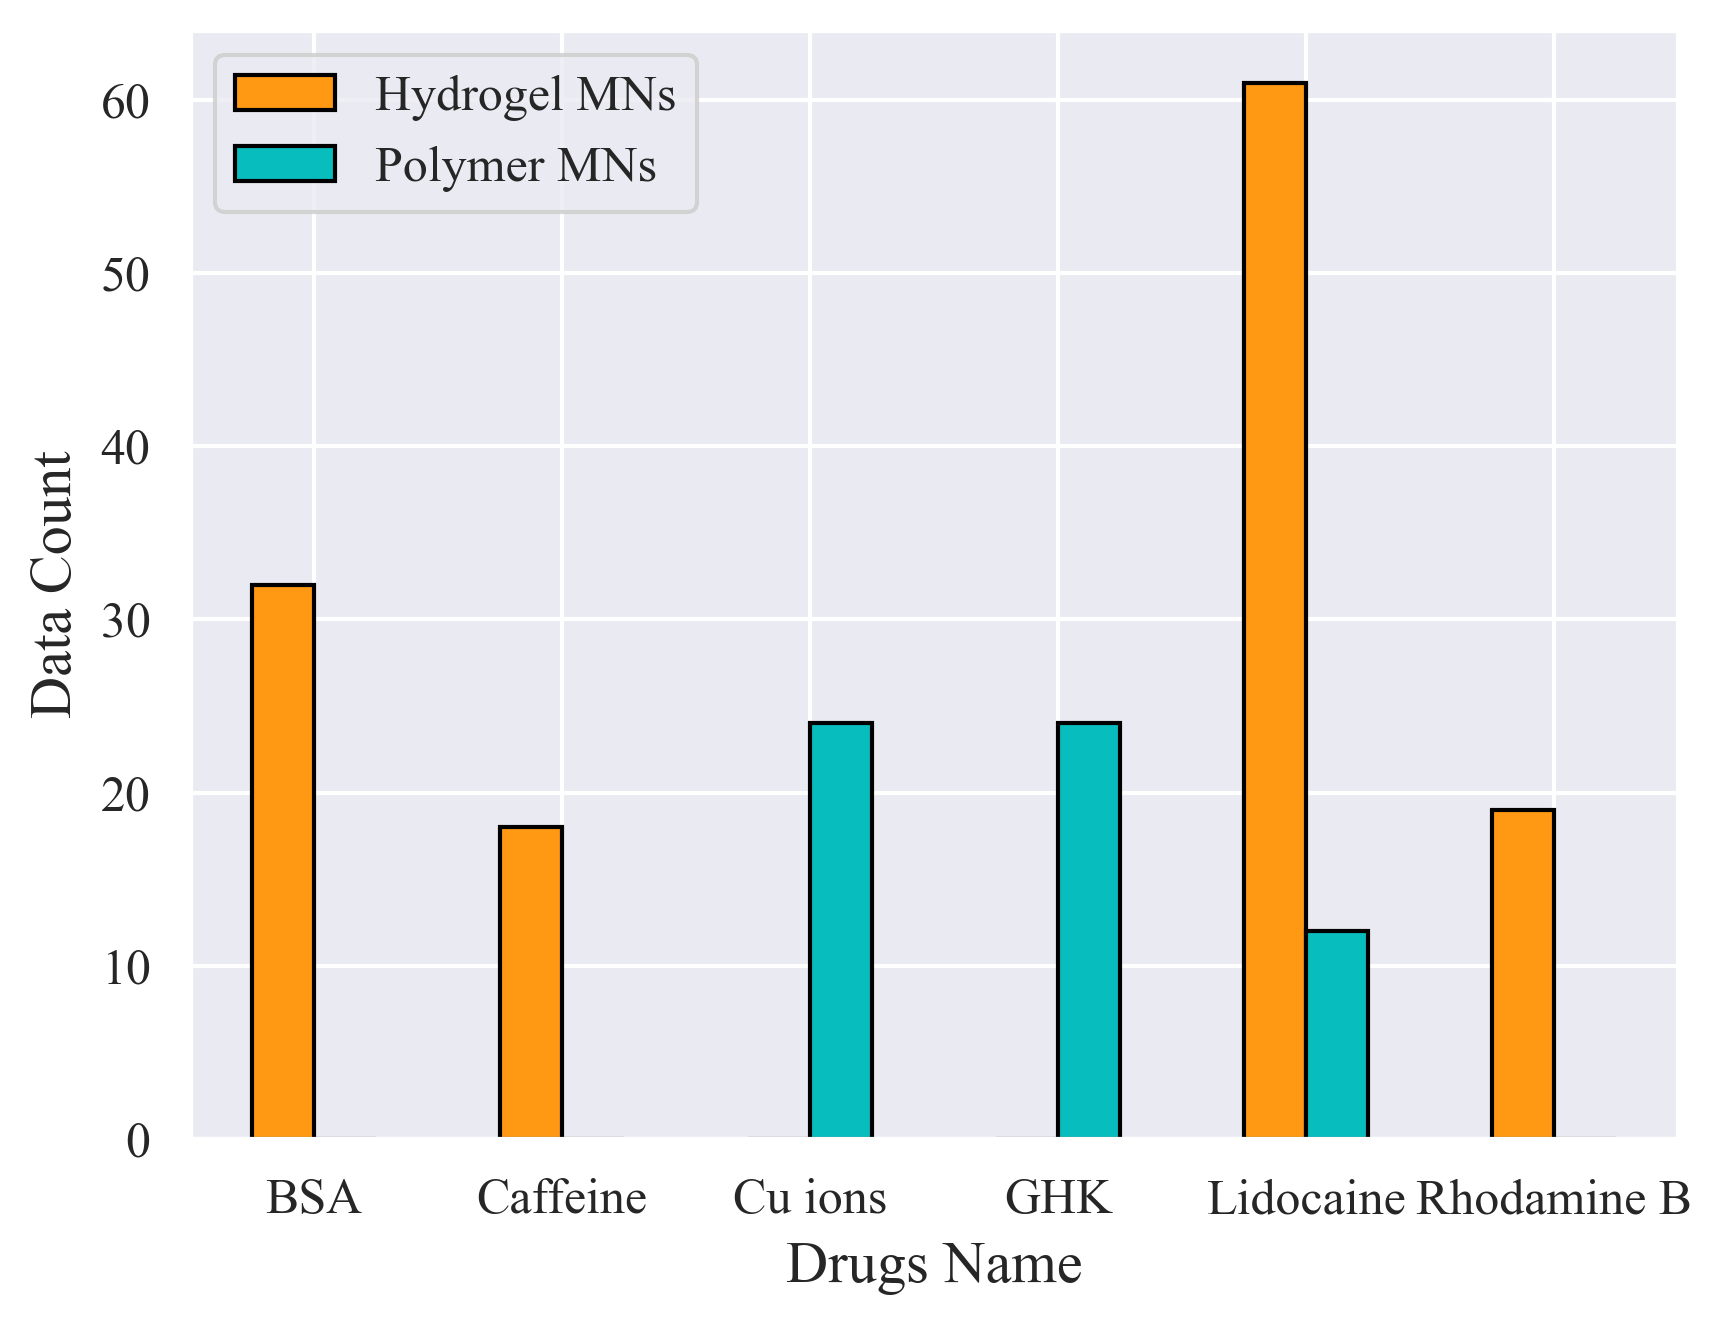

In [13]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Drug name'],df['MN type'])
col_map = ['#ff9914','#08bdbd']
ax=prd_gender.plot(kind='bar',color=col_map, edgecolor='black', linewidth=1)
plt.xticks(rotation=0)
plt.xlabel("Drugs Name", fontsize=14, fontname='Times New Roman')
plt.ylabel("Data Count", fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
#plt.title("Drug & Microneedle-type data count", fontname='Times New Roman', fontsize=14)
plt.legend(["Hydrogel MNs", "Solid MNs"], prop=font)

<Figure size 3000x3000 with 0 Axes>

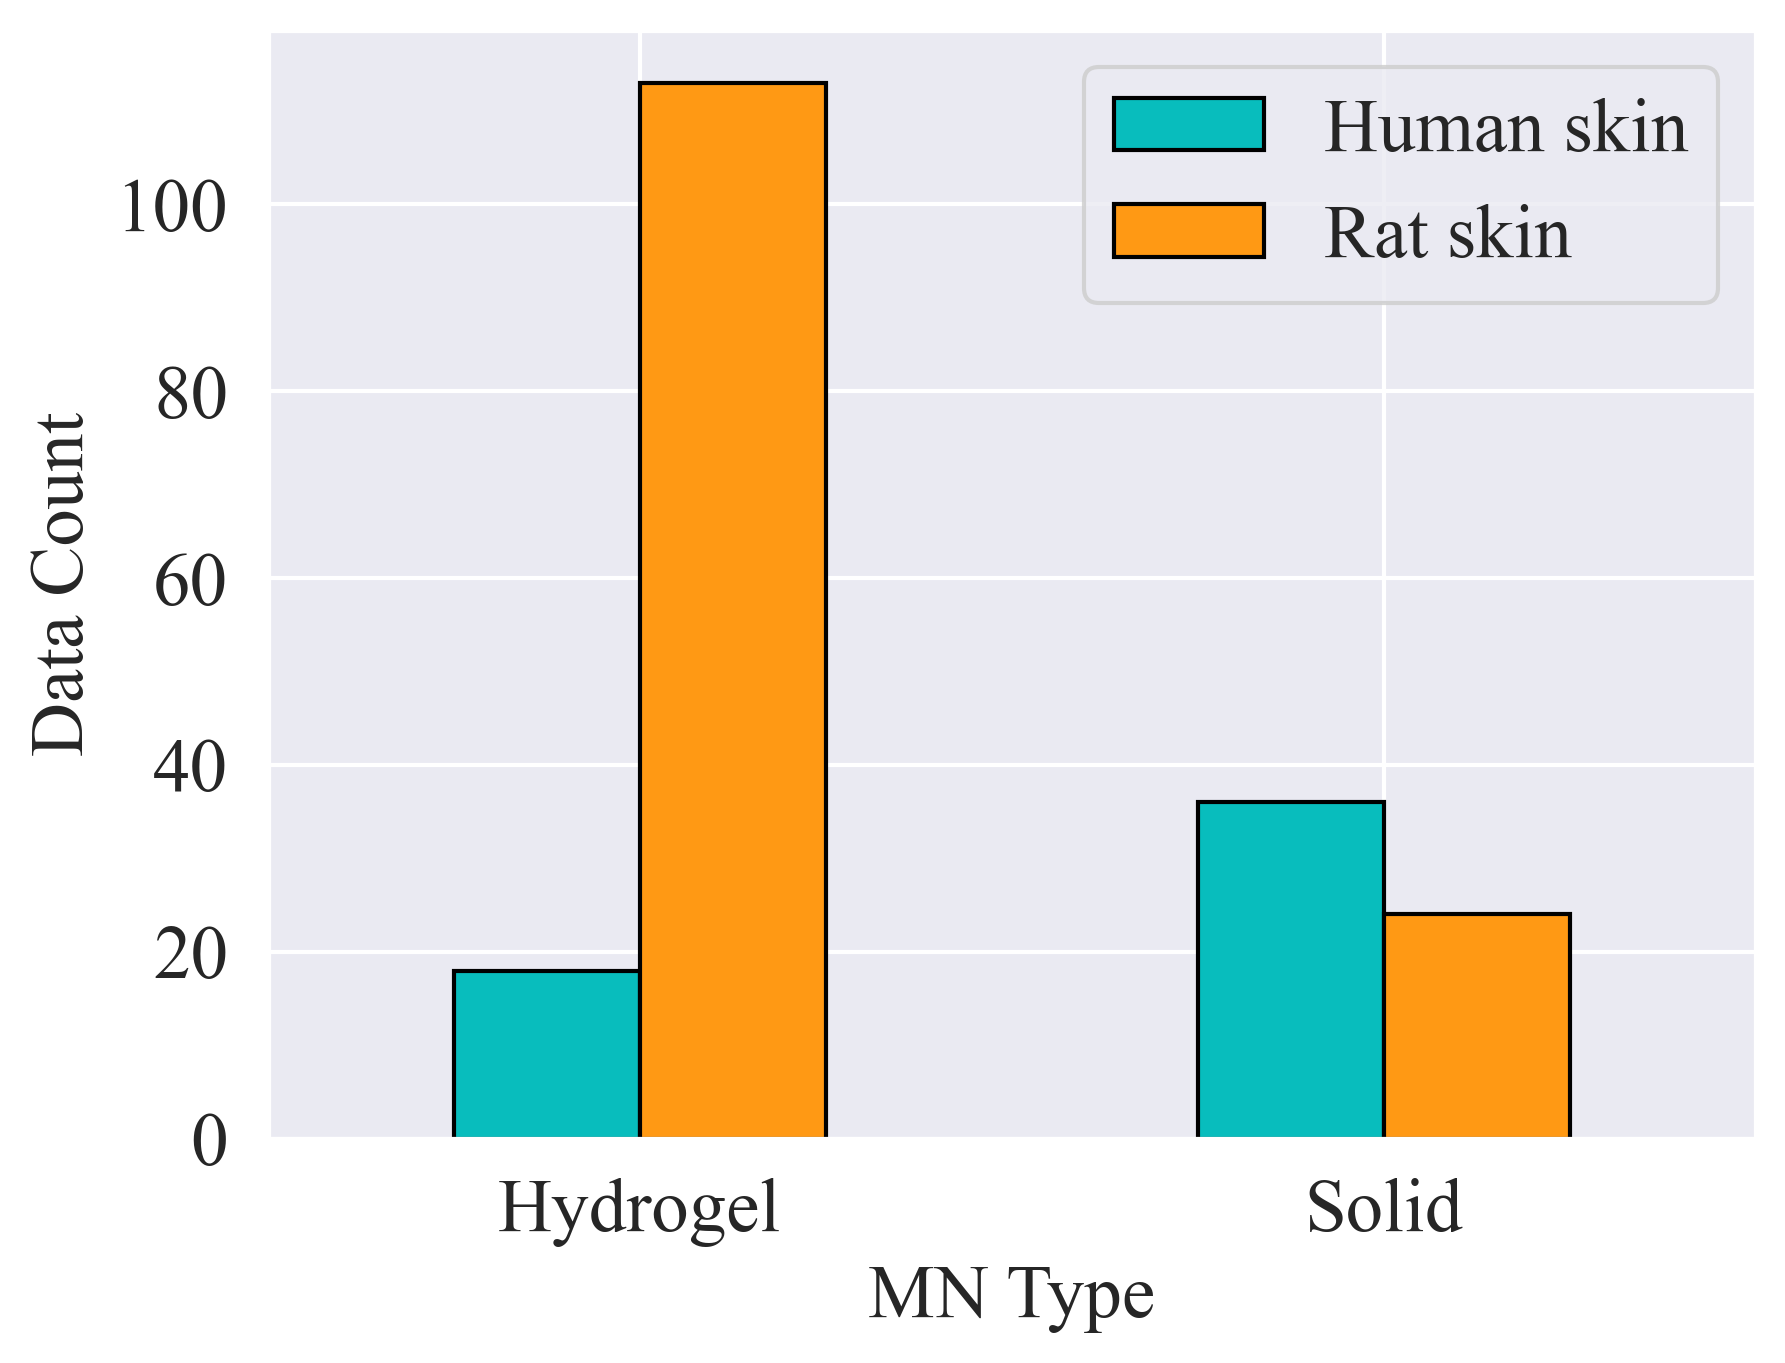

In [52]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['MN type'],df['Skin type'])
col_map = ['#08bdbd','#ff9914']
ax=prd_gender.plot(kind='bar',color=col_map, edgecolor='black', linewidth=1)
plt.xticks(rotation=0)
plt.xlabel("MN Type", fontsize=18, fontname='Times New Roman')
plt.ylabel("Data Count", fontsize=18, fontname='Times New Roman')
plt.xticks([0,1], ["Hydrogel", "Solid"], fontsize=18, fontname='Times New Roman')
plt.yticks(fontsize=18, fontname='Times New Roman')
#plt.title("Skin & Microneedle-type data count", fontname='Times New Roman', fontsize=14)
#plt.legend(["Human skin", "Rat skin"], prop=font)
plt.legend(["Human skin", "Rat skin"], fontsize="18")

In [91]:
col = ['Drug name', 'Skin type', 'MN type']
for i in col:
    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")
    print('Unique Values in "{}":\n'.format(i),df[i].value_counts())

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Unique Values in "Drug name":
 Drug name
Lidocaine    73
BSA          32
Cu ions      24
GHK          24
Rhod.B       19
Caffeine     18
Name: count, dtype: int64
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Unique Values in "Skin type":
 Skin type
Rat skin      136
Human skin     54
Name: count, dtype: int64
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Unique Values in "MN type":
 MN type
Hydrogel    130
Solid        60
Name: count, dtype: int64


68.58638525009155
31.41361176967621


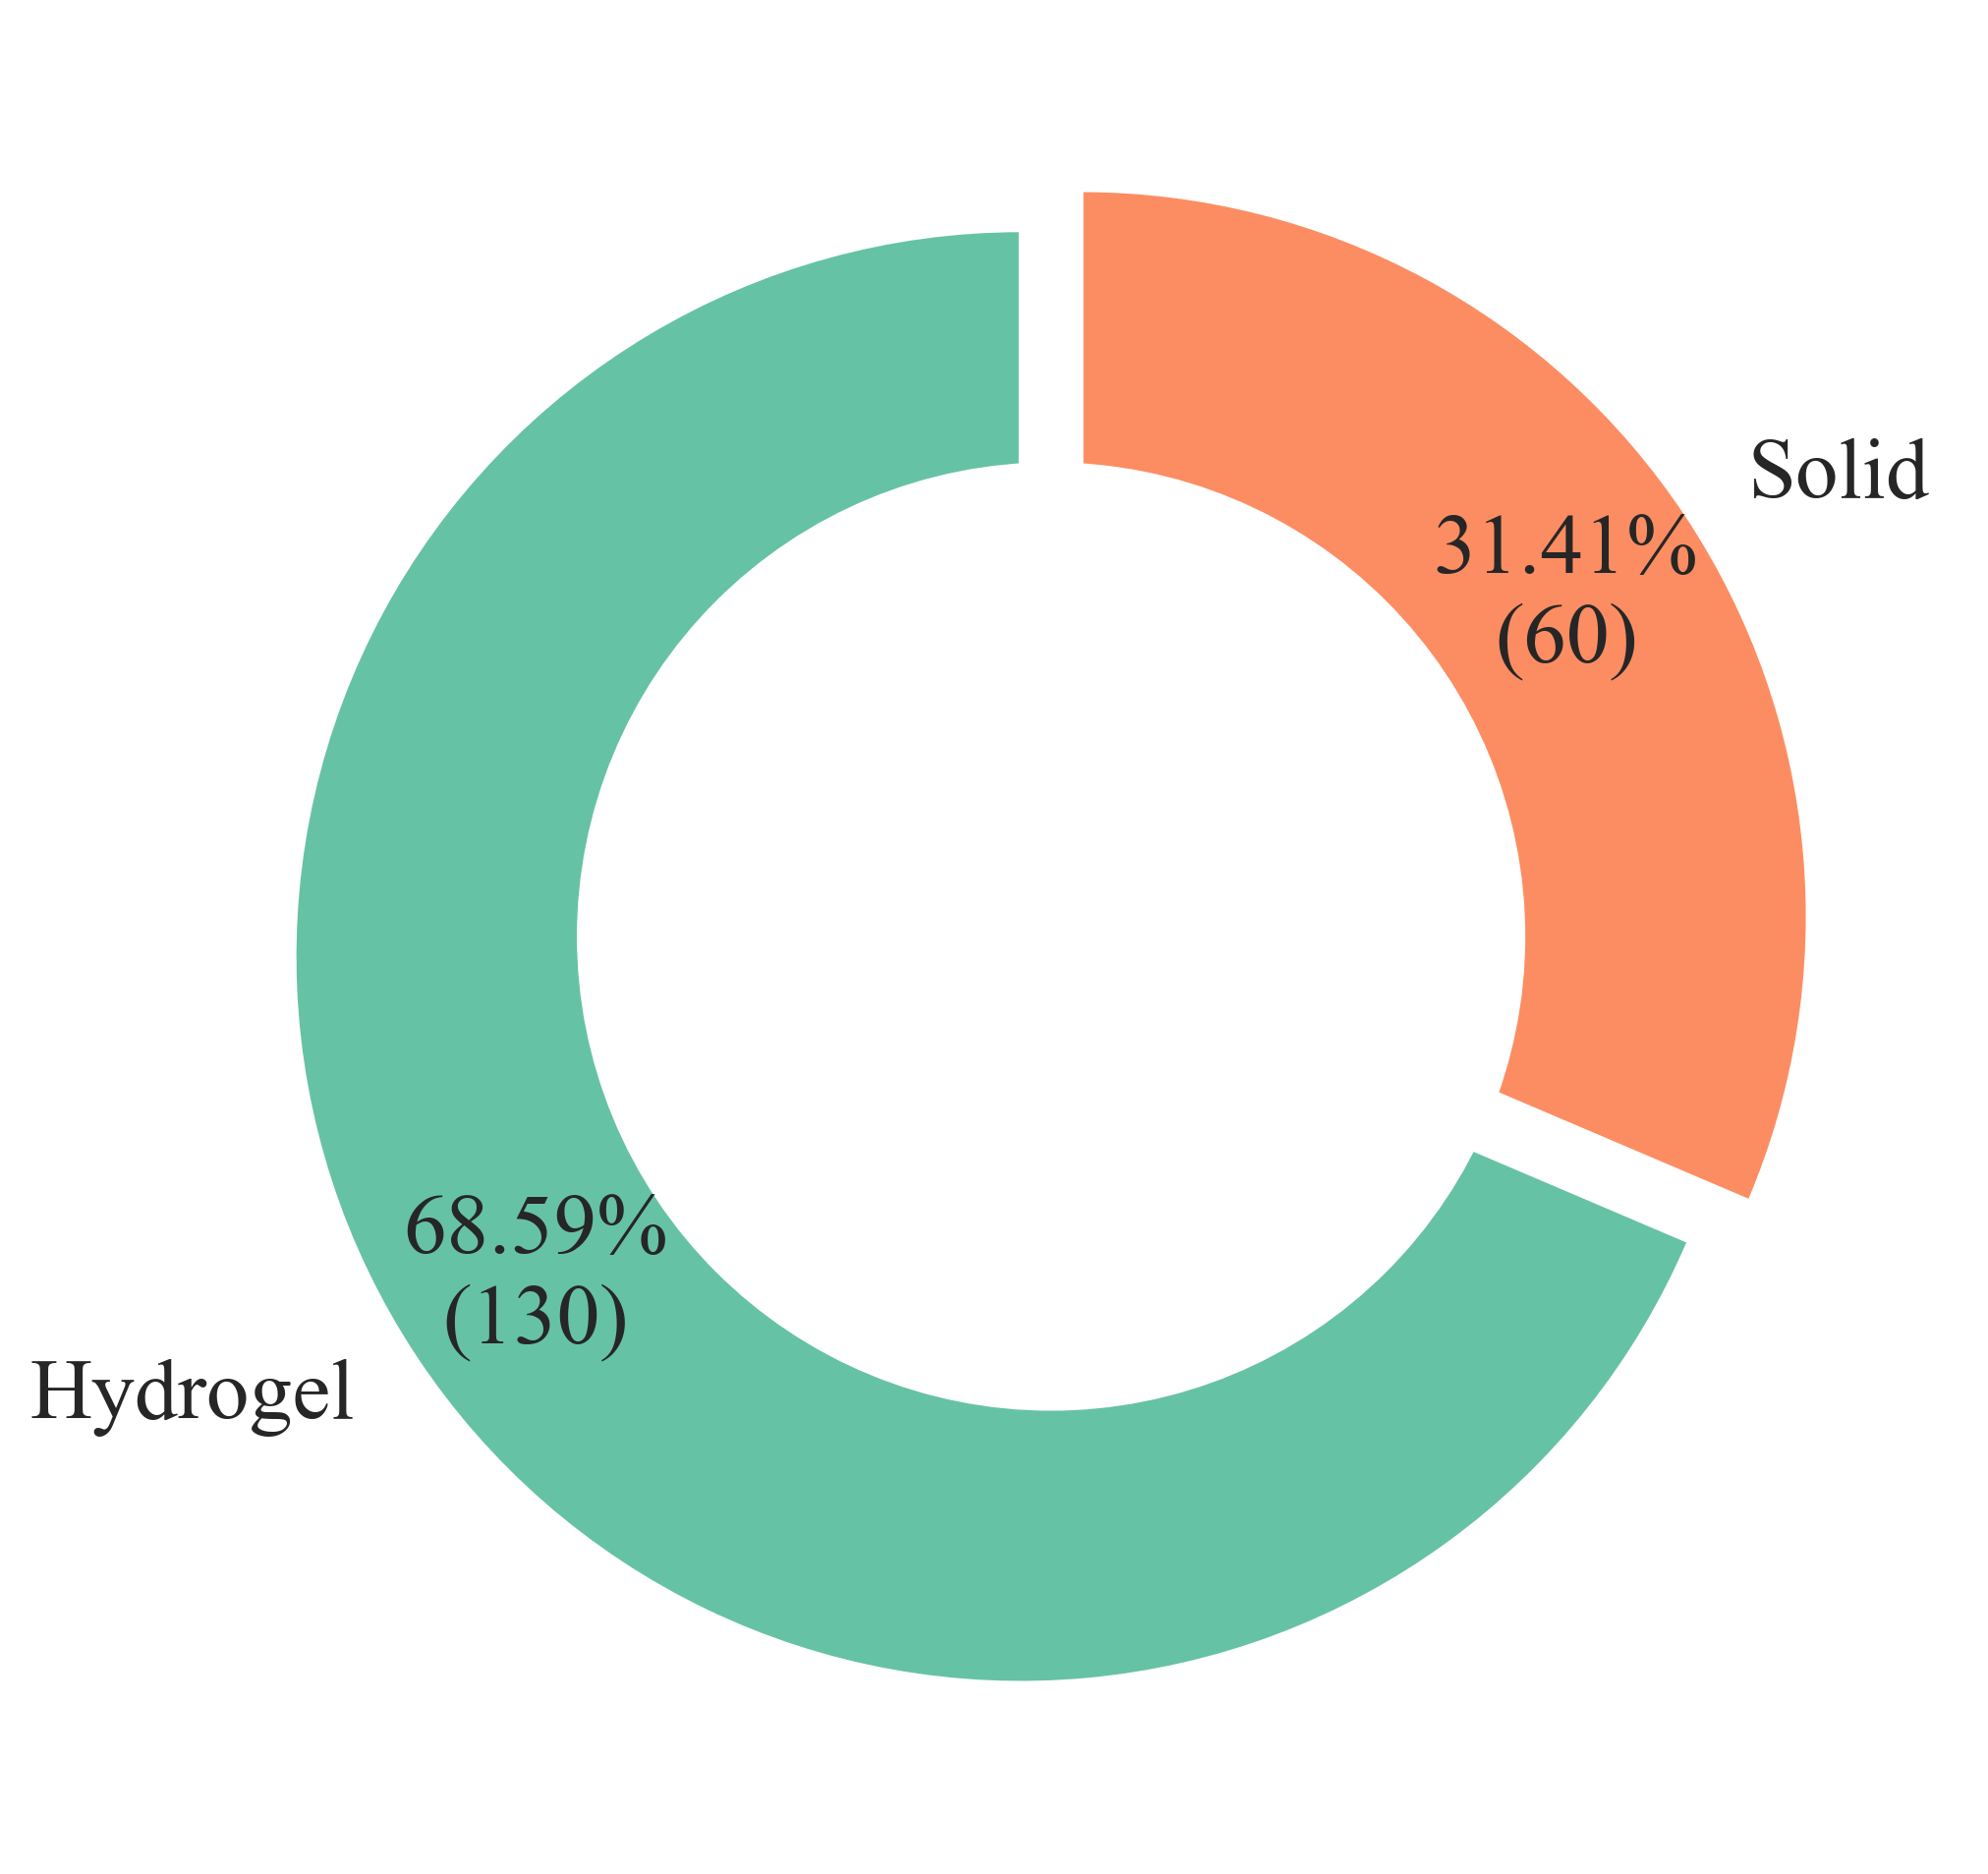

In [55]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = 190

#plt.pie.update({'family':'Berkelium Type'})
plt.pie(df['MN type'].value_counts(), labels=df['MN type'].value_counts().index,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct=(my_fmt),
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05],
    textprops={'family':'Times New Roman', 'fontsize':21}
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

71.7277467250824
28.272250294685364


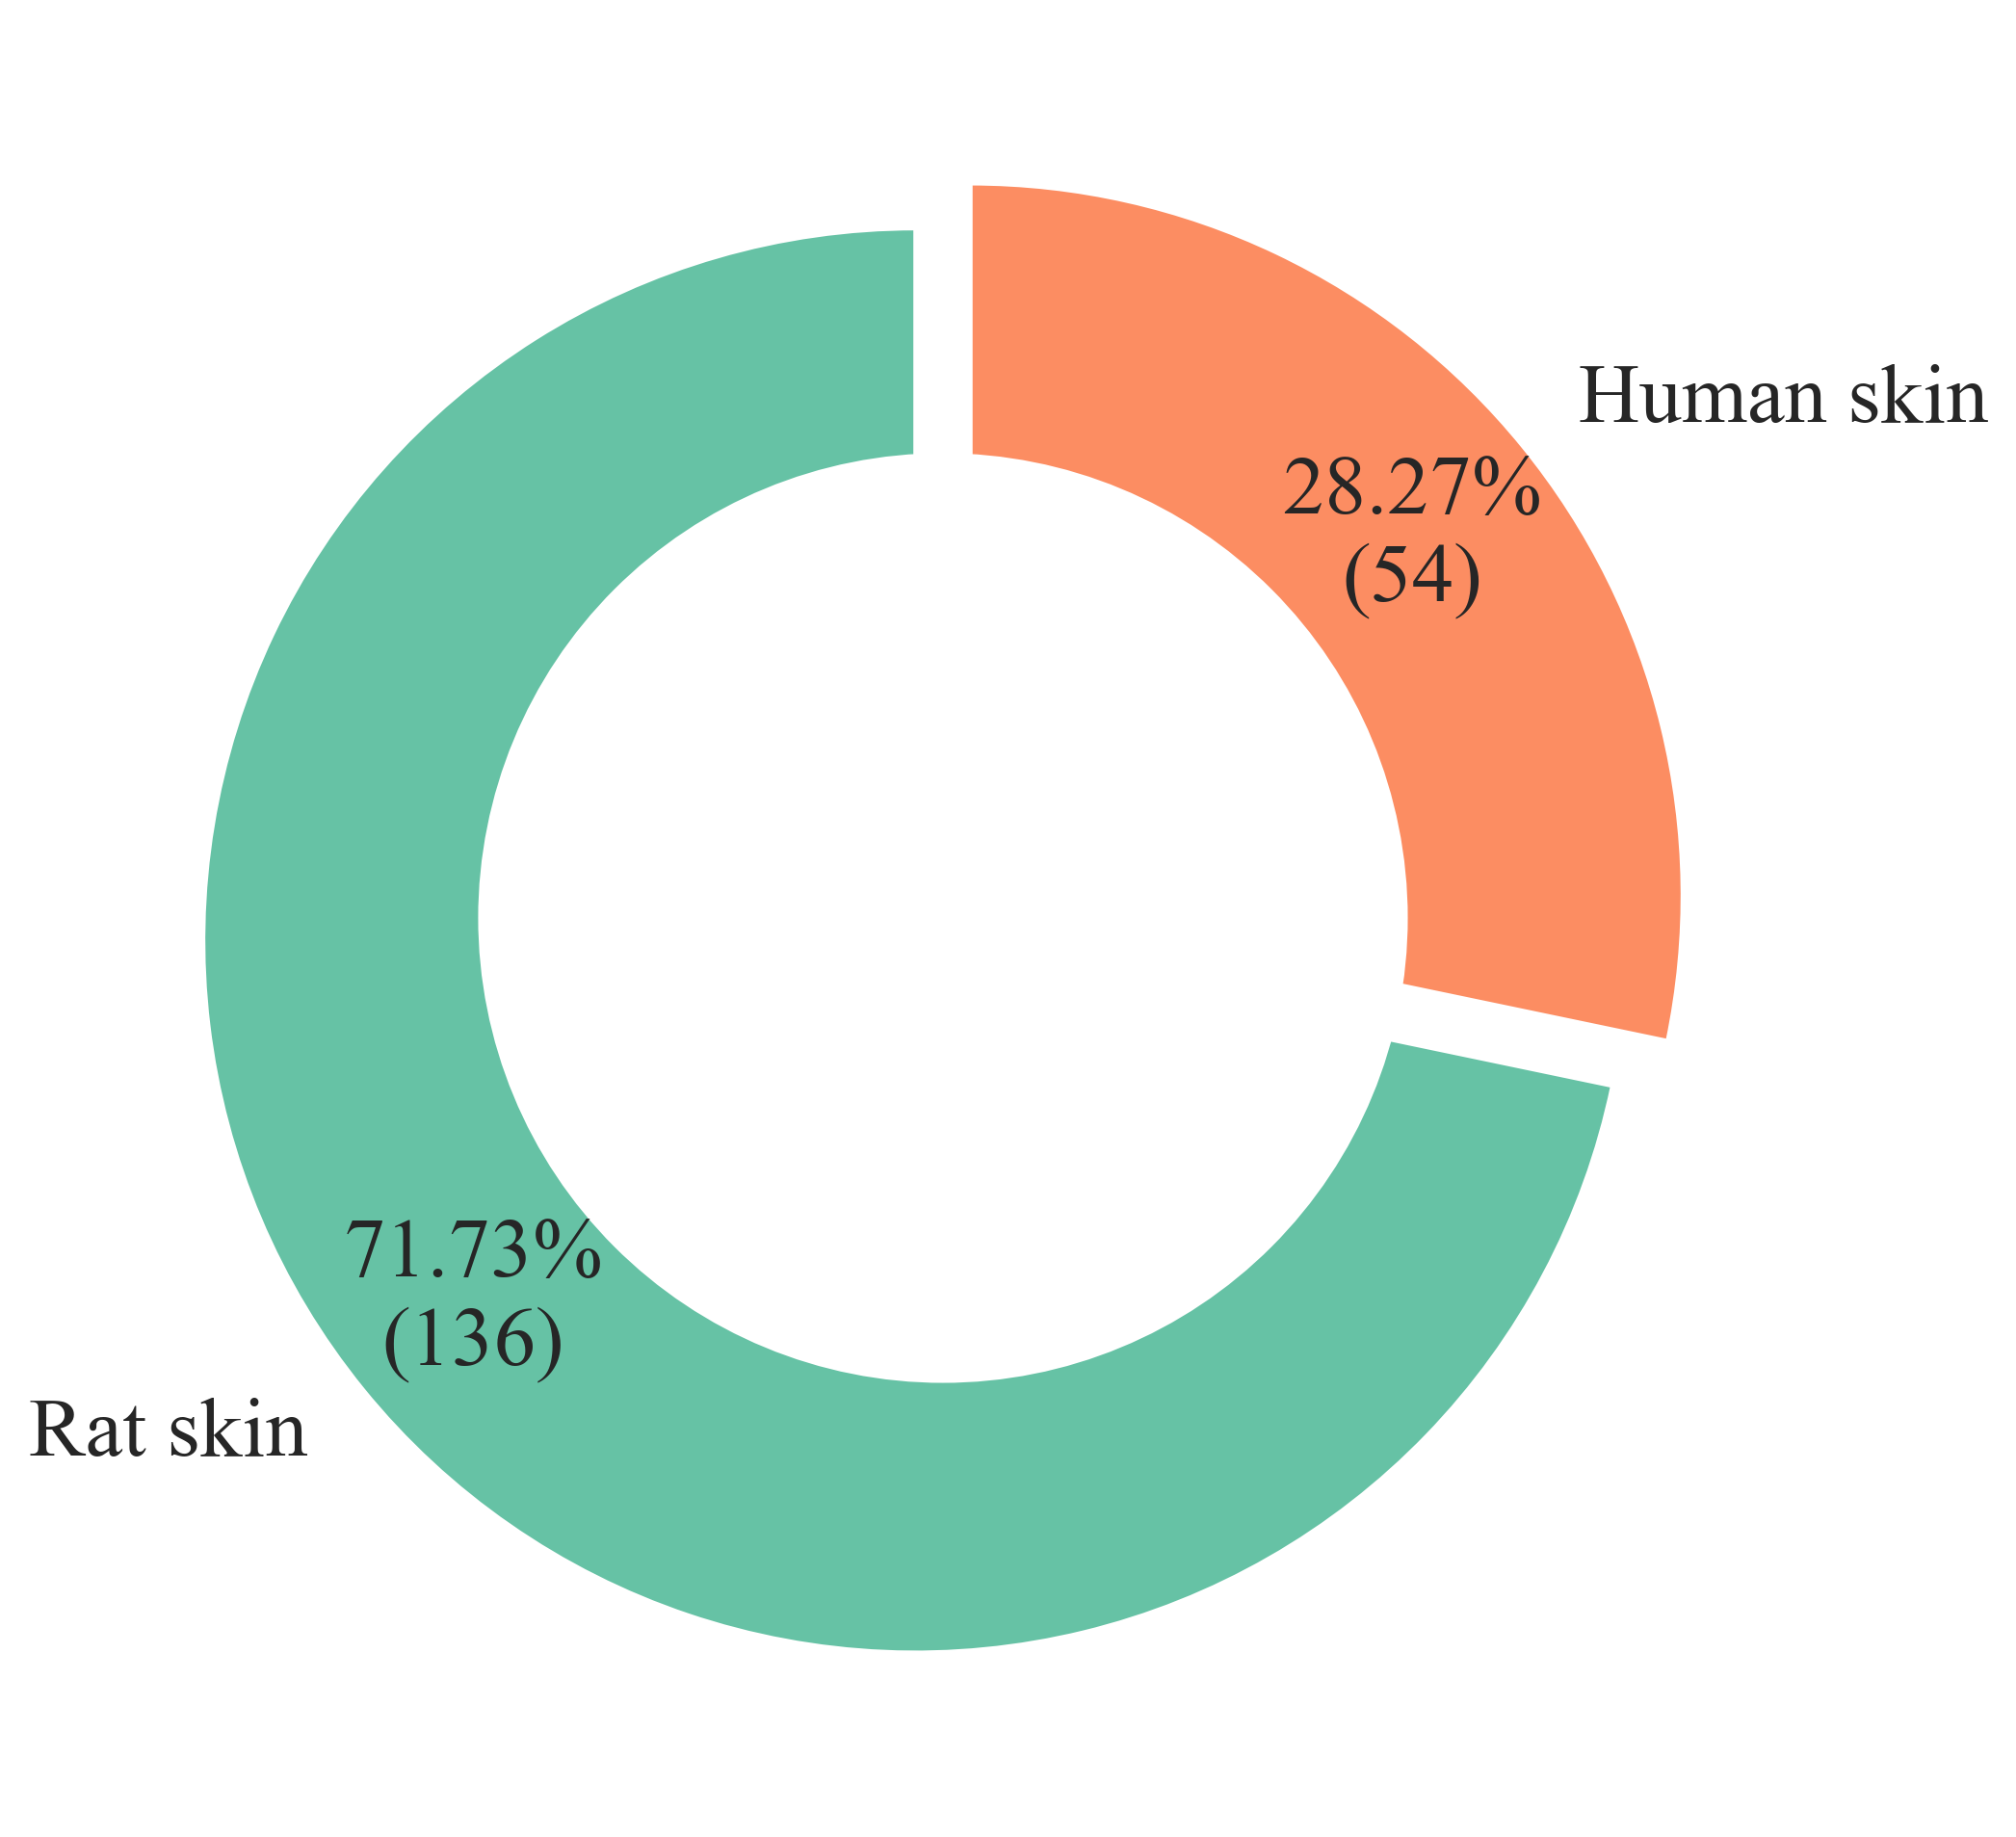

In [56]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = 190

plt.pie(df['Skin type'].value_counts(), labels=df['Skin type'].value_counts().index,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct=my_fmt,
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05],
    textprops={'family':'Times New Roman', 'fontsize':21}
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

38.21989595890045
17.277486622333527
12.56544440984726
12.56544440984726
9.947644174098969
9.424083679914474


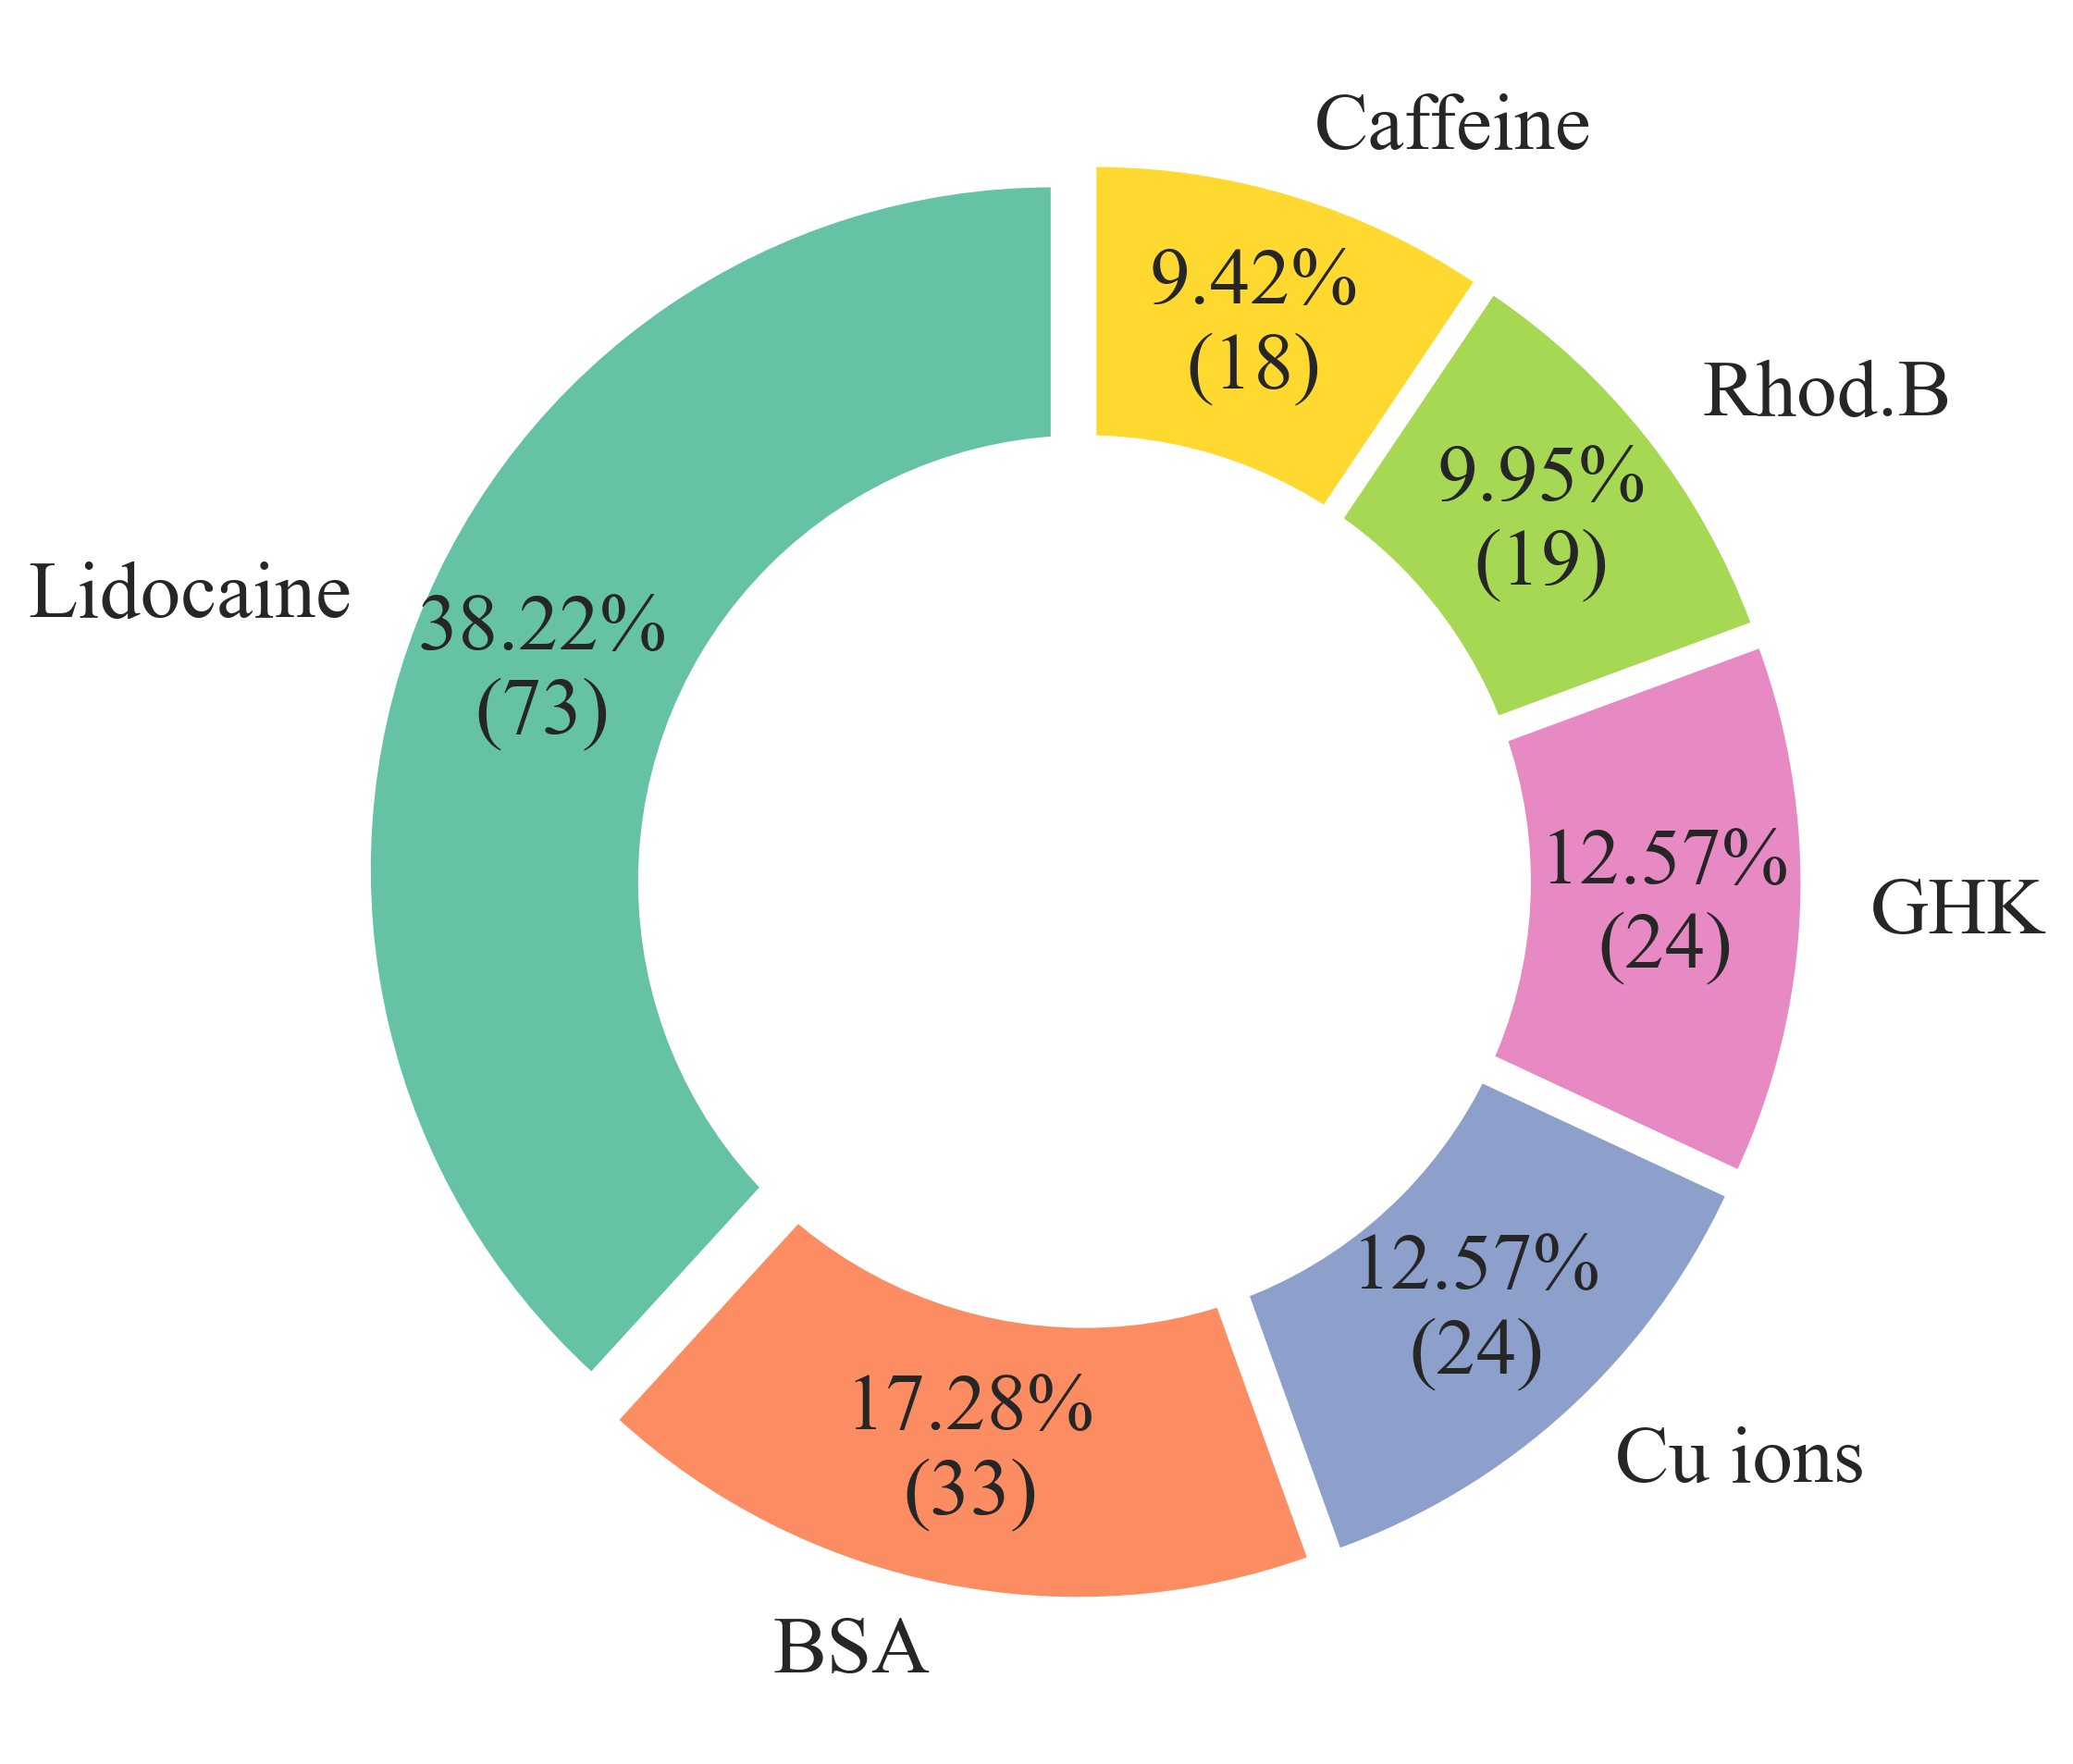

In [57]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = 190

plt.pie(df['Drug name'].value_counts(), labels=df['Drug name'].value_counts().index,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct=my_fmt,
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    textprops={'family':'Times New Roman', 'fontsize':21}
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [125]:
# Encoding
rplc = {"BSA": 1, "Lidocaine":2, "Rhod.B":3, "Caffeine":4, "Cu ions":5, "GHK":6}
df["Drug name"].replace(rplc, inplace=True) 
df[['Skin type']] = df[['Skin type']].replace(to_replace={'Rat skin':1, 'Human skin':2})
df[['MN type']] = df[['MN type']].replace(to_replace={'Hydrogel':1, 'Solid':2})

#OR --> df[['Drug name']] = df[['Drug name']].replace(to_replace={'BSA':1, 'lidocaine':2, 'Rhodamine B':3, 'caffeine':4, 'copper ions':5, 'GHK peptide':6})

In [145]:
df[df.columns.tolist()] = df[df.columns.tolist()].astype('float64')
df.dtypes

Drug name                     float64
Drug loaded                   float64
Drug MW                       float64
MN Length                     float64
Skin type                     float64
MN type                       float64
MN surface area               float64
Permeation time               float64
Drug permeation percentage    float64
Drug permeation amount        float64
dtype: object

In [147]:
df.head()

,Drug name,Drug loaded,Drug MW,MN Length,Skin type,MN type,MN surface area,Permeation time,Drug permeation percentage,Drug permeation amount
1,1.0,531.0,66000.0,0.82,1.0,1.0,26.761033,1.0,17.695887,93.965158
2,1.0,526.0,66000.0,0.82,1.0,1.0,26.761033,1.0,19.606937,103.132490
3,1.0,1637.0,66000.0,0.82,1.0,1.0,26.761033,1.0,21.105305,345.493842
4,1.0,531.0,66000.0,0.82,1.0,1.0,26.761033,3.0,43.424459,230.583876
5,1.0,526.0,66000.0,0.82,1.0,1.0,26.761033,3.0,41.065641,216.005271


# Correlation

## Heatmap

In [151]:
# Changing features name for better heatmap visualization
df.columns = ["Drug Name", "Drug Loaded", "Molecular weight", "MN Length", "Skin Type", "MN Type", "MN Surface area", "Permeation time", "Permeation Percentage", "Permeation amount"]

In [4]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [26]:
#from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('traffic_light',colors = ["darkred","#f54242","#f57542","#f5ec42", "#bff542","#57f542","darkgreen"], N=256)

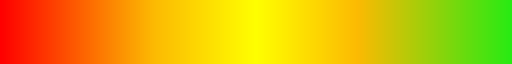

In [42]:
c = ["red","#fcba03","yellow","#fcba03","#28eb13"]
v = [0,0.30,0.5,0.70,1]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)
cmap

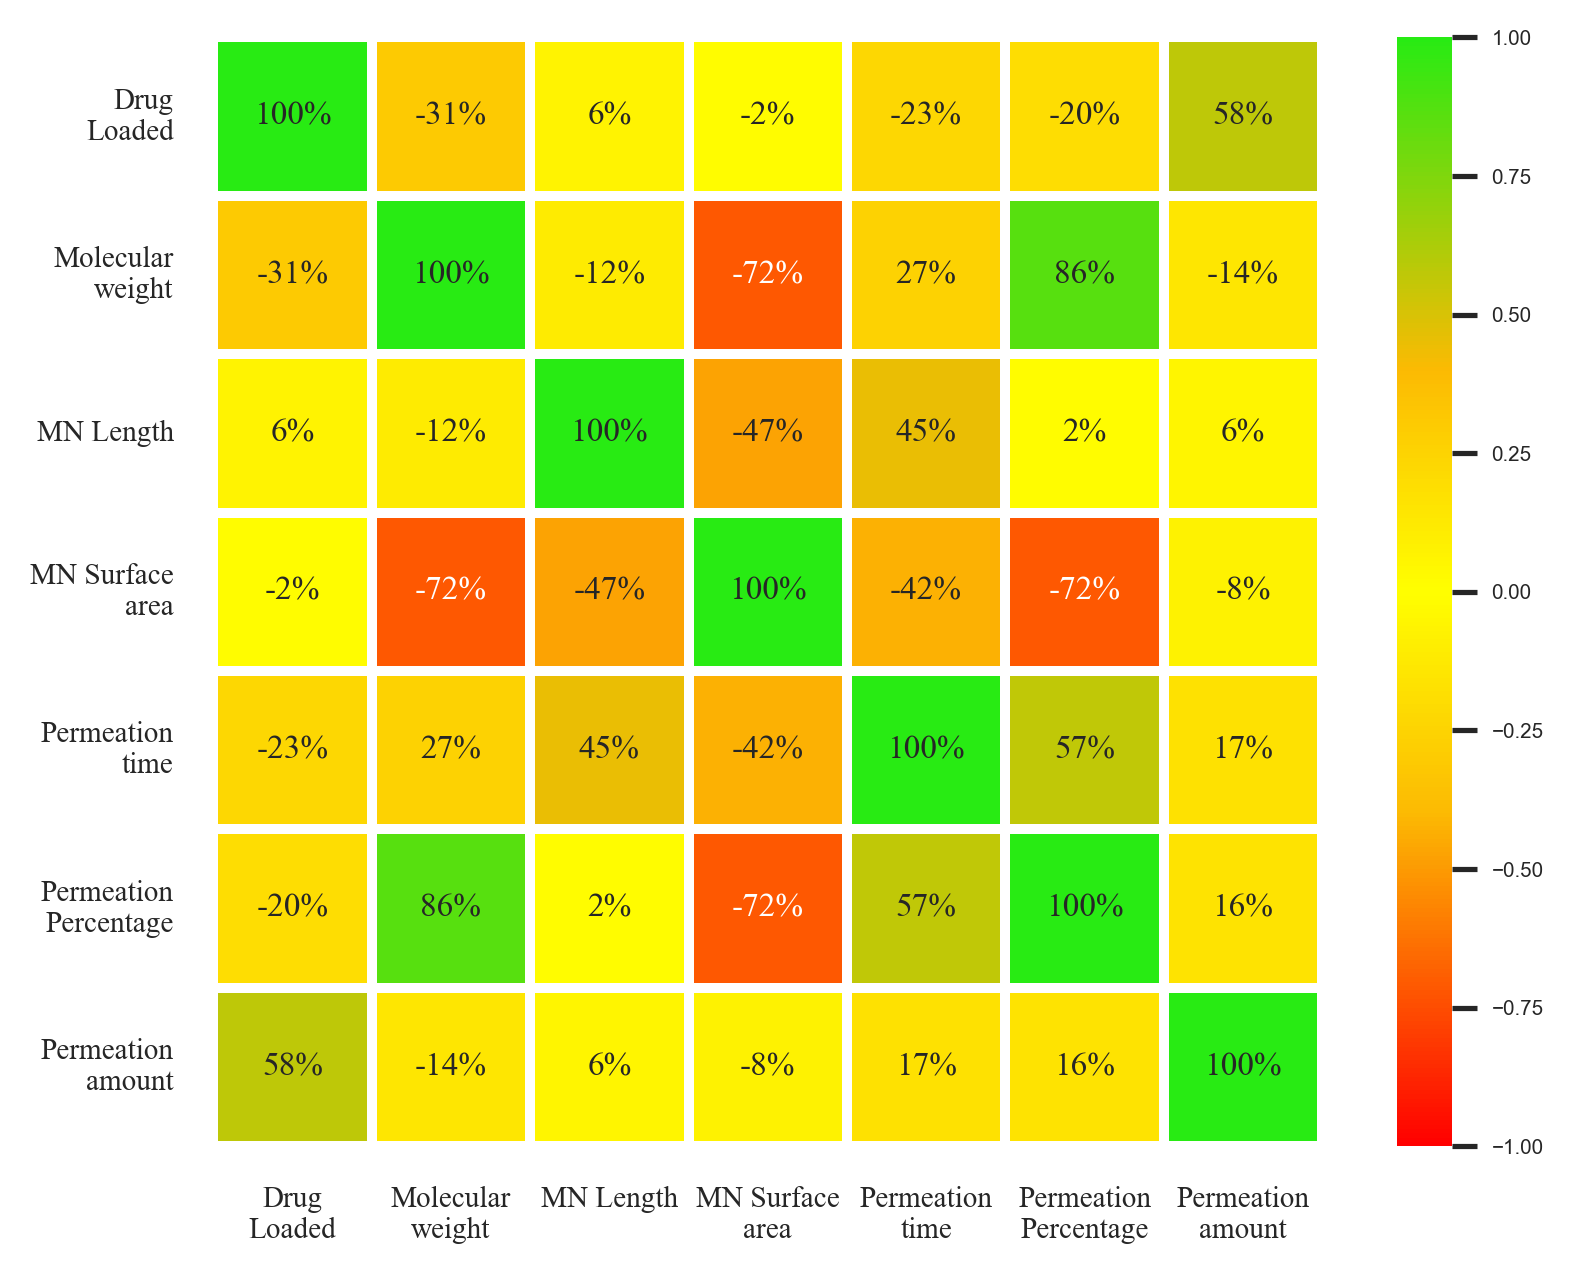

In [43]:
sns.set(font_scale=0.45)
#plt.title('Pearson correlation',fontsize=10,fontname='Times New Roman')
#cmap = sns.diverging_palette(260, 10, as_cmap=True)
x = sns.heatmap(df[["Drug Loaded","Molecular weight","MN Length","MN Surface area", "Permeation time", "Permeation Percentage", "Permeation amount"]].corr("pearson"), vmax=1.0, vmin=-1, annot=True, annot_kws={"name": 'Times New Roman', 'size':8}, square='square', cmap=cmap, cbar=True, fmt = '.0%', linewidths=2)
#cbar_kws = {'shrink': 1.2,'ticks': [-1.0, -0.75, -0.50, -0.25, 0.0, 0.25, 0.50, 0.75, 1.0]}
wrap_labels(x, 10)
for tick in x.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(7)
for tick in x.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(7)
    #wrap_labels(tick, 10)
    

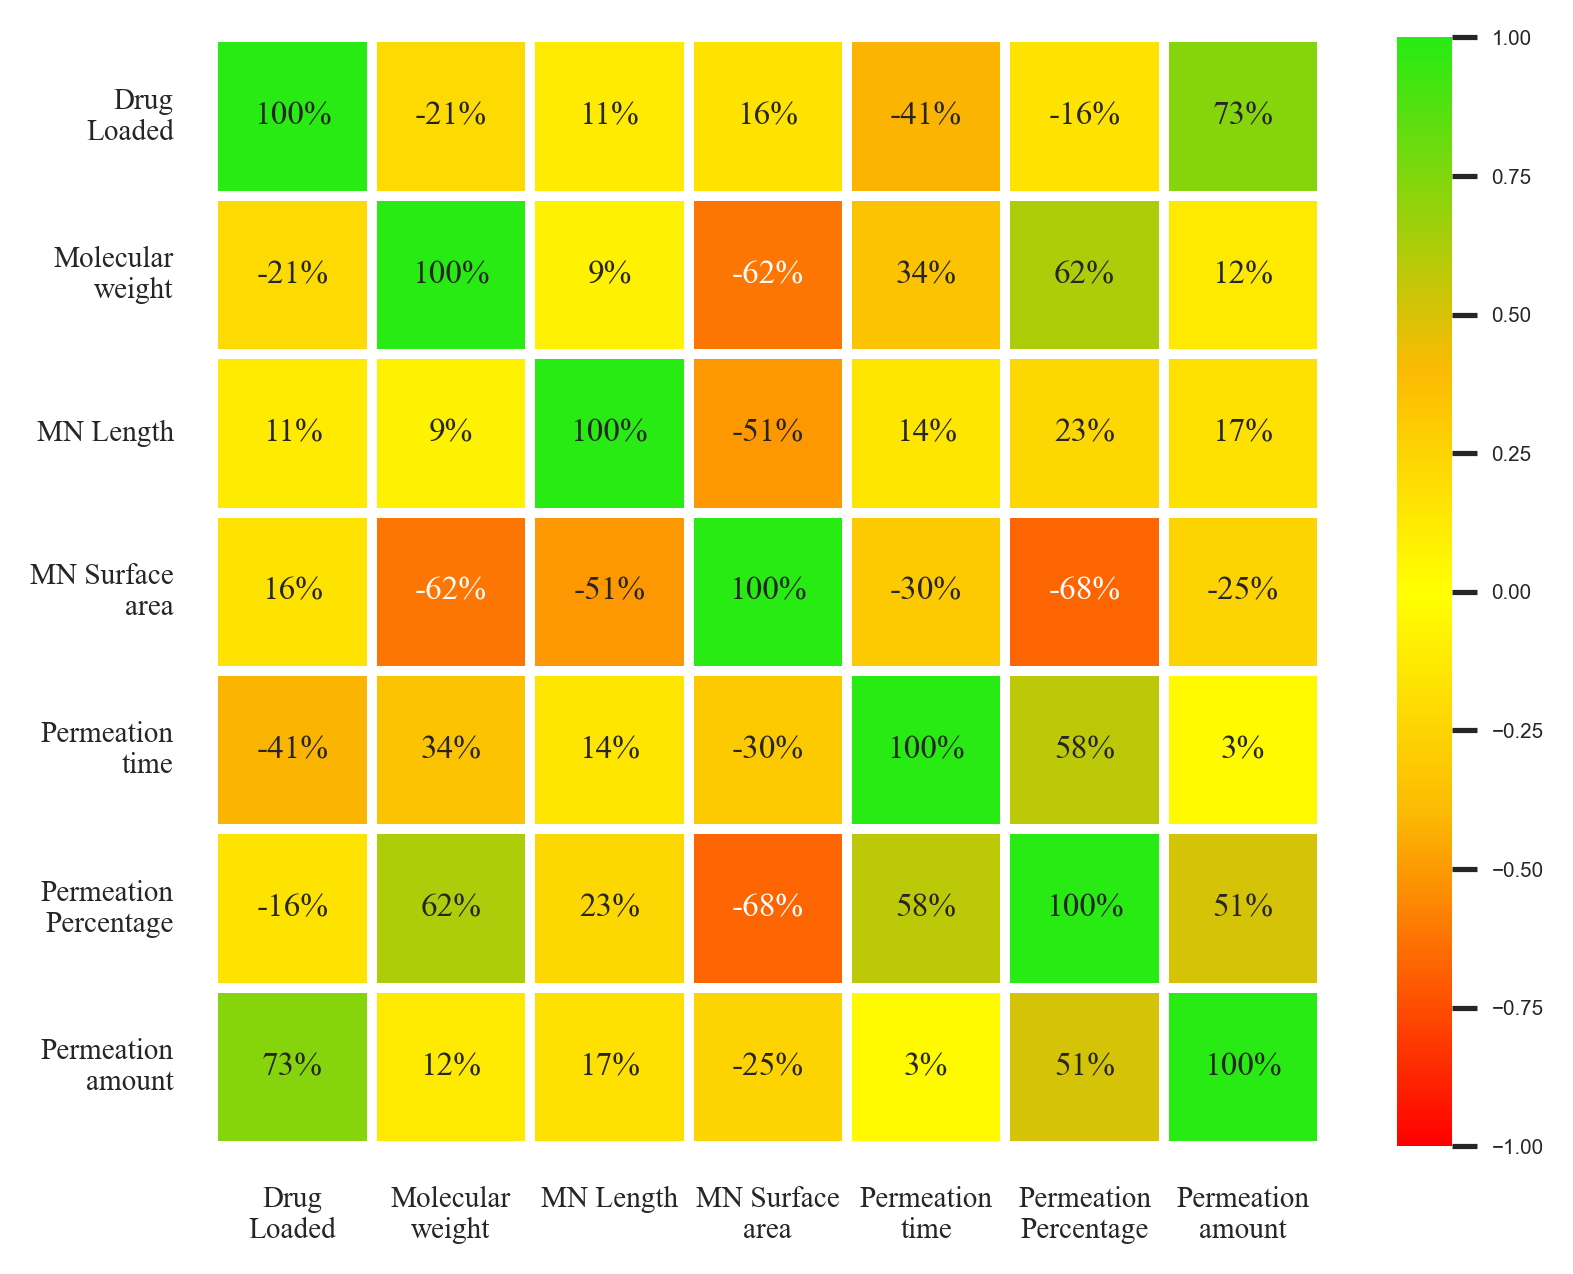

In [44]:
sns.set(font_scale=0.45)
#plt.title('Spearman correlation',fontsize=10, fontname='Times New Roman')
#cmap = sns.diverging_palette(260, 10, as_cmap=True)
x = sns.heatmap(df[["Drug Loaded","Molecular weight","MN Length","MN Surface area", "Permeation time", "Permeation Percentage", "Permeation amount"]].corr("spearman"), vmax=1.0, vmin=-1, annot=True, annot_kws={"name": 'Times New Roman', 'size':8}, square='square', cmap=cmap, fmt = '.0%', linewidths=2, cbar=True)
wrap_labels(x, 10)
for tick in x.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(7)
    #tick.set_fontweight('bold')
for tick in x.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(7)
    #tick.set_fontweight('bold')

## ANOVA Numerical vs Categorical

In [156]:
# Changing features name for our convenience
df.columns = ["drug_name", "drug_load", "drug_mw", "mn_length", "skin_type", "mn_type", "mn_surface_area", "permeation_time", "drug_perm_per", "drug_perm_amt"]

In [226]:
cat = ['drug_name']

rel = []
no_rel=[]
labels = []
values = []

df_anova = df[['drug_perm_per', 'drug_perm_amt', 'drug_name']]
grps = pd.unique(df_anova.drug_name.values)

for j in range(len(df_anova.columns)-1):

    d_data = {grp:df_anova[df_anova.columns[j]][df_anova.drug_name == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[1], d_data[2], d_data[3], d_data[4], d_data[5],  d_data[6])
    print("P_Value of {0} and drug_name".format(df_anova.columns[j]), p)

    if p < 0.05:
        print("There is relation between {0} and drug_name\n".format(df_anova.columns[j]))
        rel.append((df_anova.columns[j], 'drug_name'))
    else:
        print("There is no relation between {0} and drug_name\n".format(df_anova.columns[j]))
        no_rel.append((df_anova.columns[j], 'drug_name'))
    labels.append(df_anova.columns[j])
    values.append(p)

P_Value of drug_perm_per and drug_name 1.9612087528948421e-57
There is relation between drug_perm_per and drug_name

P_Value of drug_perm_amt and drug_name 1.864876516671705e-12
There is relation between drug_perm_amt and drug_name



In [230]:
#num = ['drug_load', 'drug_mw', 'mn_length', 'mn_surface_area', 'permeation_time', 'drug_perm_per', 'drug_perm_amt']
cat = ['skin_type', 'mn_type']

rel = []
no_rel=[]

for i in range(len(cat)):
        df_anova = df[['drug_perm_per', 'drug_perm_amt', cat[i]]]
        grps = pd.unique(df_anova[[cat[i]]].values.reshape(190,))

        for j in range(len(df_anova.columns)-1):

            d_data = {grp:df_anova[df_anova.columns[j]][df_anova[cat[i]] == grp] for grp in grps}

            F, p = stats.f_oneway(d_data[1], d_data[2])
            print("P_Value of {0} and {1}".format(df_anova.columns[j], cat[i]), p)

            if p < 0.05:
                print("There is relation between {0} and {1} \n".format(df_anova.columns[j], cat[i]))
                rel.append((df_anova.columns[j], cat[i]))
            else:
                print("There is no relation between {0} and {1} \n".format(df_anova.columns[j], cat[i]))
                no_rel.append((df_anova.columns[j], cat[i]))

P_Value of drug_perm_per and skin_type 9.083868532130686e-09
There is relation between drug_perm_per and skin_type 

P_Value of drug_perm_amt and skin_type 2.728916323753918e-05
There is relation between drug_perm_amt and skin_type 

P_Value of drug_perm_per and mn_type 7.350816746784792e-09
There is relation between drug_perm_per and mn_type 

P_Value of drug_perm_amt and mn_type 1.49667766926864e-05
There is relation between drug_perm_amt and mn_type 



# Saving preprocessed df file for further process

In [ ]:
df.to_csv('df1.csv', index=False)

# Statistics

In [234]:
df.describe()

,drug_name,drug_load,drug_mw,mn_length,skin_type,mn_type,mn_surface_area,permeation_time,drug_perm_per,drug_perm_amt
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.005263,19862.712632,11323.140737,0.862339,1.284211,1.315789,32.471681,10.346053,17.573865,2201.833829
std,1.676155,27033.224221,24671.745149,0.160873,0.452229,0.466058,3.593109,12.297625,24.507484,4534.081061
min,1.000000,50.000000,63.500000,0.700000,1.000000,1.000000,26.761033,0.083333,0.019844,1.053700
25%,2.000000,736.600000,234.340000,0.700000,1.000000,1.000000,29.968839,1.125000,1.417987,21.898239
50%,2.000000,5000.000000,234.340000,0.875973,1.000000,1.000000,32.127277,6.000000,6.126603,448.668690
75%,4.750000,27024.000000,479.020000,0.889000,2.000000,2.000000,36.855000,17.500000,19.992659,2035.575367
max,6.000000,70940.000000,66000.000000,1.250000,2.000000,2.000000,36.855000,48.000000,97.472602,29009.788010


### Before dropping outlier

In [256]:
df = pd.read_csv("s1.csv")                                   # Import dataset (drawn from literature of Yuan et. al.)
df.drop([0,1], axis=0, inplace=True)                         # Irrelevant row (you can check using df.head())
df.reset_index(inplace=True)                                 # Resetting index numbers
df.drop('index', axis=1, inplace=True)                       # Removing index number column
df.columns  = df.iloc[0].values                              # First row is the name of the columns
df.drop([0], axis=0, inplace=True)                           # Columns name assigned as per the first row. Now we are deleting the first row
df.drop(df.columns[10:], axis=1, inplace=True)               # Reference and Nan columns are of no use for ML models

df.columns = ["Drug name", "Drug loaded", "Drug MW", "MN Length", "Skin type", "MN type", "MN surface area", "Permeation time", "Drug permeation percentage", "Drug permeation amount"]
df[['Drug name']] = df[['Drug name']].replace(to_replace={'BSA':1, 'lidocaine':2, 'Rhodamine B':3, 'caffeine':4, 'copper ions':5, 'GHK peptide':6})
df[df.columns.to_list()] = df[df.columns.to_list()].astype('float64')
df.head()

,Drug name,Drug loaded,Drug MW,MN Length,Skin type,MN type,MN surface area,Permeation time,Drug permeation percentage,Drug permeation amount
1,1.0,531.0,66000.0,0.82,1.0,1.0,26.761033,1.0,17.695887,93.965158
2,1.0,526.0,66000.0,0.82,1.0,1.0,26.761033,1.0,19.606937,103.132490
3,1.0,1637.0,66000.0,0.82,1.0,1.0,26.761033,1.0,21.105305,345.493842
4,1.0,531.0,66000.0,0.82,1.0,1.0,26.761033,3.0,43.424459,230.583876
5,1.0,526.0,66000.0,0.82,1.0,1.0,26.761033,3.0,41.065641,216.005271


In [254]:
df.describe()

,Drug name,Drug loaded,Drug MW,MN Length,Skin type,MN type,MN surface area,Permeation time,Drug permeation percentage,Drug permeation amount
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2.994764,19764.410471,11609.407016,0.862117,1.282723,1.314136,32.441782,10.543194,18.049385,2196.474954
std,1.678023,26996.196293,24922.750486,0.160478,0.451506,0.465391,3.607384,12.564186,25.310956,4522.739954
min,1.000000,50.000000,63.500000,0.700000,1.000000,1.000000,26.761033,0.083333,0.019844,1.053700
25%,2.000000,736.600000,234.340000,0.700000,1.000000,1.000000,29.968839,1.250000,1.426732,22.202777
50%,2.000000,5000.000000,234.340000,0.875973,1.000000,1.000000,32.127277,6.000000,6.174966,448.817319
75%,4.500000,27024.000000,479.020000,0.889000,2.000000,2.000000,36.855000,18.000000,20.187464,1988.860703
max,6.000000,70940.000000,66000.000000,1.250000,2.000000,2.000000,36.855000,48.000000,108.398225,29009.788010
